In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
oil_data = pd.read_csv("oil.csv")
holiday_data = pd.read_csv("holidays_events.csv", index_col='date',parse_dates=['date'])
store_data = pd.read_csv("stores.csv")

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
transaction_data = pd.read_csv("transactions.csv")

sample = pd.read_csv('sample_submission.csv')

In [3]:
sample['sales'].max()

0.0

In [4]:
test_data

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [5]:
train_data

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [6]:
train_data.isna().sum() # no data is missing

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [7]:
test_data.isna().sum() # no data is missing

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [8]:
train_data.family.nunique() # there are 33 family of product

33

In [9]:
train = train_data.copy()
train['date'] = pd.to_datetime(train['date'])
train = train.set_index('date')
train = train.drop('id',axis = 1)
train

,store_nbr,family,sales,onpromotion
date,,,,
2013-01-01,1,AUTOMOTIVE,0.000,0
2013-01-01,1,BABY CARE,0.000,0
2013-01-01,1,BEAUTY,0.000,0
2013-01-01,1,BEVERAGES,0.000,0
2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...
2017-08-15,9,POULTRY,438.133,0
2017-08-15,9,PREPARED FOODS,154.553,1
2017-08-15,9,PRODUCE,2419.729,148


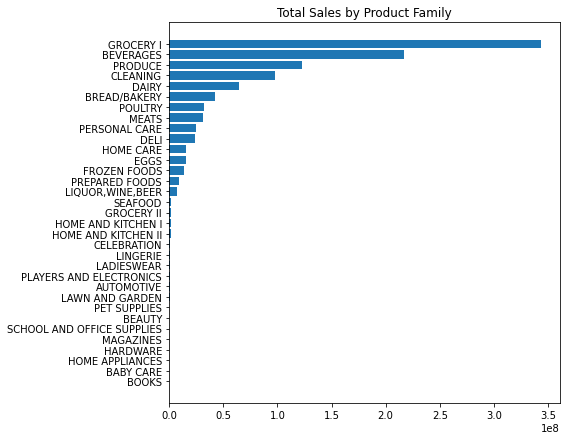

In [10]:
family = train.groupby('family').sales.sum() #group by family

fig, ax = plt.subplots(figsize=(7,7))
plt.barh(family.groupby('family').sum().sort_values().index, family.groupby('family').sum().sort_values())
ax.set(title='Total Sales by Product Family')
plt.show()

In [11]:
total = family.sum()
proportion = ((family/total)*100).sort_values(ascending=False)
proportion = pd.DataFrame(proportion)
proportion.head(10)

,sales
family,
GROCERY I,31.990346
BEVERAGES,20.207284
PRODUCE,11.428795
CLEANING,9.083197
DAIRY,6.006428
BREAD/BAKERY,3.924384
POULTRY,2.968952
MEATS,2.895414
PERSONAL CARE,2.290520


nearly 80% of sales are [GROCERY I, BEVERAGES, PRODUCE, CLEANING, DAIRY] 

In [12]:
train_data.store_nbr.nunique() #There are 54 stores 

54

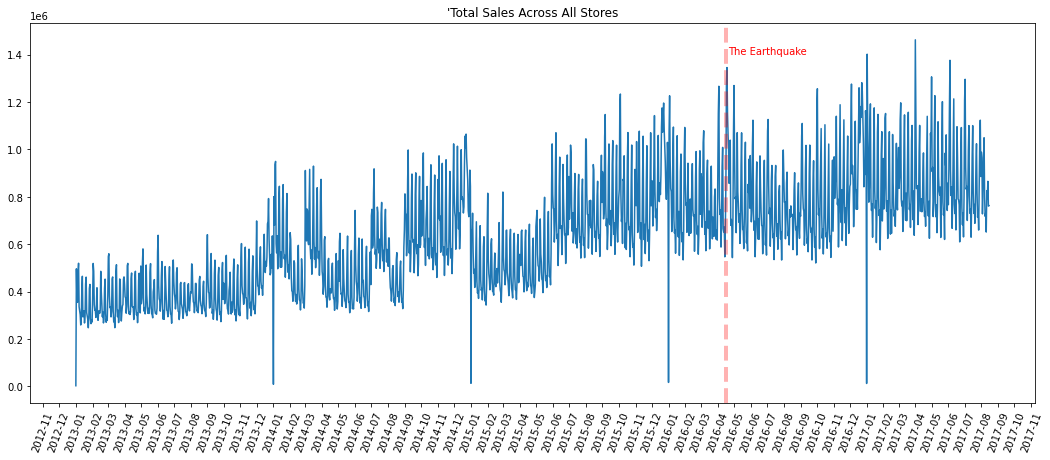

In [13]:
fig, ax = plt.subplots(figsize=(18, 7))
ax.set(title="'Total Sales Across All Stores")
total_sales = train.sales.groupby("date").sum()
plt.plot(total_sales)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=70)
plt.axvline(x=pd.Timestamp('2016-04-16'),color='r',linestyle='--',linewidth=4,alpha=0.3)
plt.text(pd.Timestamp('2016-04-20'),1400000,'The Earthquake',rotation=360,c='r')


plt.show()

In [14]:
oil_data

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [15]:
pd.date_range(start = '2013-01-01', end = '2017-08-15' ).difference(oil_data.index) #Date sales in df_train stop at 2017-08-15

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', length=1688, freq=None)

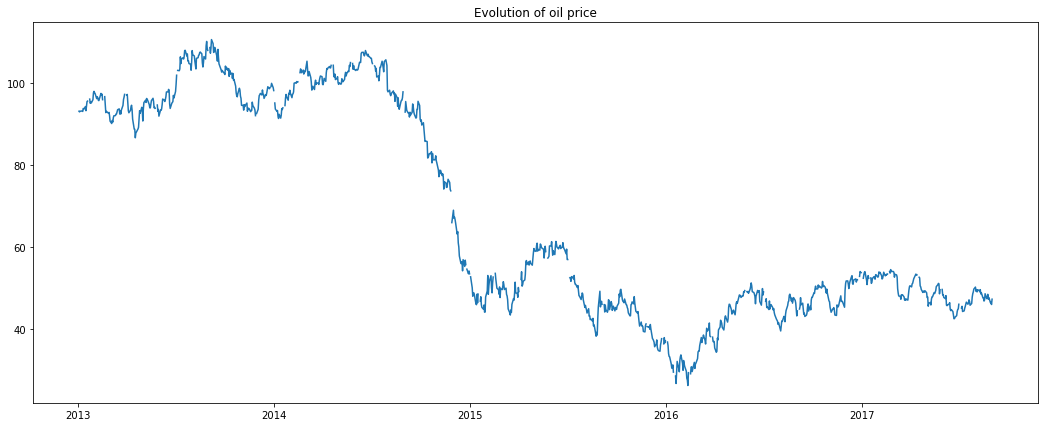

In [16]:
oil_data['date'] = pd.to_datetime(oil_data['date'])

fig, ax = plt.subplots(figsize=(18, 7))

ax.set(title="Evolution of oil price")
x = np.array(oil_data['date'])
y = np.array(oil_data['dcoilwtico'])

plt.plot(x, y);

There is missing a lot of data

In [17]:
oil_data = oil_data.set_index('date')
oil_data = oil_data.resample('1D').sum()
oil_data.reset_index()

,date,dcoilwtico
0,2013-01-01,0.00
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-05,0.00
...,...,...
1699,2017-08-27,0.00
1700,2017-08-28,46.40
1701,2017-08-29,46.46
1702,2017-08-30,45.96


In [18]:
pd.date_range(start = '2013-01-01', end = '2017-08-15' ).difference(oil_data.index) #Date sales in df_train stop at 2017-08-15

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [19]:
oil_data['dcoilwtico'] = np.where(oil_data['dcoilwtico']==0, np.nan, oil_data['dcoilwtico'])
oil_data['interpolated_price'] = oil_data.dcoilwtico.interpolate()

In [20]:
oil_data = oil_data.drop('dcoilwtico',axis=1)

In [21]:
oil_data['price_chg'] = oil_data.interpolated_price - oil_data.interpolated_price.shift(1)
oil_data['pct_chg'] = oil_data['price_chg']/oil_data.interpolated_price.shift(-1)

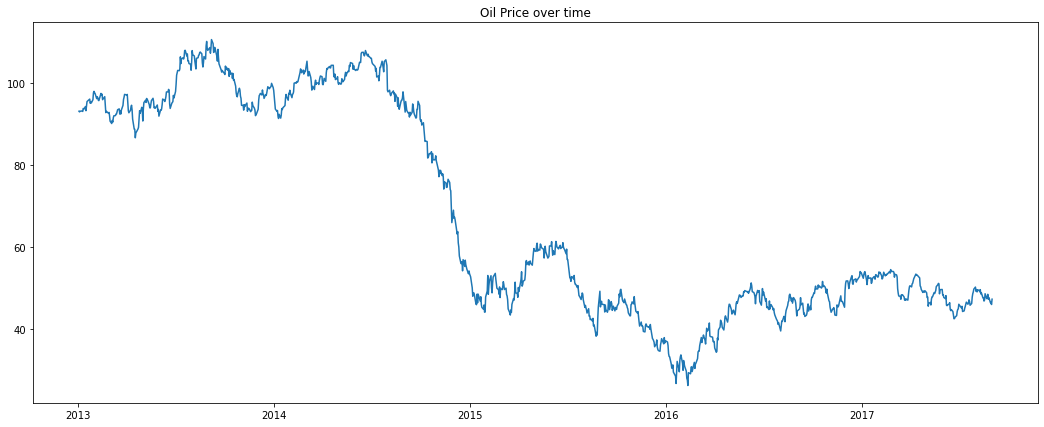

In [22]:
fig,ax = plt.subplots(figsize=(18, 7))
plt.plot(oil_data['interpolated_price'])
plt.title('Oil Price over time')

plt.show()

In [23]:
daily_total_sales = total_sales.copy()

In [24]:
daily_total_sales = daily_total_sales.resample('1D').sum()
daily_total_sales

date
2013-01-01      2511.618999
2013-01-02    496092.417944
2013-01-03    361461.231124
2013-01-04    354459.677093
2013-01-05    477350.121229
                  ...      
2017-08-11    826373.722022
2017-08-12    792630.535079
2017-08-13    865639.677471
2017-08-14    760922.406081
2017-08-15    762661.935939
Freq: D, Name: sales, Length: 1688, dtype: float64

In [25]:
oil_data.interpolated_price.loc['2013-01-01':'2017-08-15']

date
2013-01-01          NaN
2013-01-02    93.140000
2013-01-03    92.970000
2013-01-04    93.120000
2013-01-05    93.146667
                ...    
2017-08-11    48.810000
2017-08-12    48.403333
2017-08-13    47.996667
2017-08-14    47.590000
2017-08-15    47.570000
Freq: D, Name: interpolated_price, Length: 1688, dtype: float64

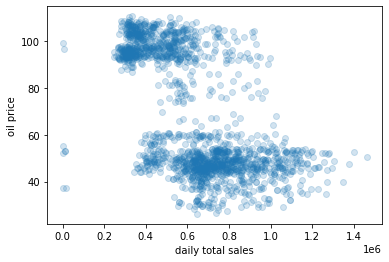

In [26]:
plt.scatter(daily_total_sales, oil_data.interpolated_price.loc['2013-01-01':'2017-08-15'],alpha=0.2)
plt.ylabel('oil price')
plt.xlabel('daily total sales')
plt.show()

In [27]:
transaction_data

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [28]:
store_data.head(10)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [29]:
# merging train and stoer data
join_df = train.merge(store_data,on='store_nbr')

#get the date and set it as index
join_df['date'] = train.index
join_df = join_df.set_index('date')

join_df

,store_nbr,family,sales,onpromotion,city,state,type,cluster
date,,,,,,,,
2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13
2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13
2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13
2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13
2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...
2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6
2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6
2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6


#### group by type of store

In [30]:
mean_sales_type = join_df.groupby('type').sales.mean()
median_sales_type = join_df.groupby('type').sales.median()
number = join_df.groupby('type').store_nbr.nunique()

type_df = pd.DataFrame((mean_sales_type,median_sales_type,number))
type_df = type_df.T
type_df.columns = ['mean','median','number of store']

type_df

,mean,median,number of store
type,,,
A,705.878743,24.0,9.0
B,326.739714,7.0,8.0
C,197.263301,5.0,15.0
D,350.979407,16.0,18.0
E,269.121301,4.0,4.0


#### group by cluster

In [31]:
mean_sales_cluster = join_df.groupby('cluster').sales.mean()
median_sales_cluster = join_df.groupby('cluster').sales.median()
number=join_df.groupby('cluster').store_nbr.nunique()

cluster_df = pd.DataFrame((mean_sales_cluster,median_sales_cluster,number))
cluster_df = cluster_df.T
cluster_df.columns = ['mean','median','number of store']

cluster_df.sort_values('mean', ascending=False)

,mean,median,number of store
cluster,,,
5,1117.245254,75.0,1.0
14,708.227718,36.0,4.0
8,647.377856,42.0,3.0
11,603.507018,5.0,3.0
17,592.231511,27.0,1.0
6,342.661732,7.0,6.0
1,326.163967,15.0,3.0
12,324.461406,10.0,1.0
13,324.364108,14.0,4.0


#### group by states

In [32]:
mean_sales_state = join_df.groupby('state').sales.mean()
median_sales_state = join_df.groupby('state').sales.median()
number=join_df.groupby('state').store_nbr.nunique()

state_df = pd.DataFrame((mean_sales_state,median_sales_state,number))
state_df = state_df.T
state_df.columns = ['mean','median','number of store']

state_df.sort_values('mean', ascending=False)

,mean,median,number of store
state,,,
Pichincha,554.110358,23.0,19.0
Tungurahua,362.632273,21.0,2.0
Loja,339.379530,22.0,1.0
El Oro,300.392253,13.0,2.0
Esmeraldas,294.963151,7.0,1.0
Azuay,294.924279,8.0,3.0
Los Rios,287.243342,10.0,2.0
Guayas,270.172671,7.0,11.0
Bolivar,234.821670,8.0,1.0


#### sales by day of week

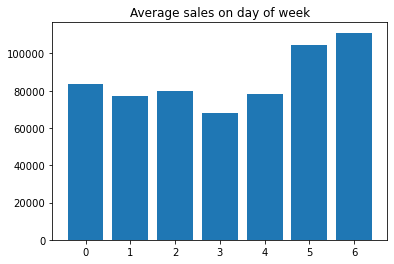

In [33]:
day_group = train.reset_index()[['date','sales']]
day_group = day_group.groupby('date')
day_group = day_group.sales.mean().to_frame()
day_group['dow'] = day_group.index.day_of_week
day_group = day_group.groupby('dow').sum()

plt.bar(day_group.index,day_group['sales'])
plt.title('Average sales on day of week')

plt.show()

as we can see that during the week-end the sales is very good

#### sales by month of year

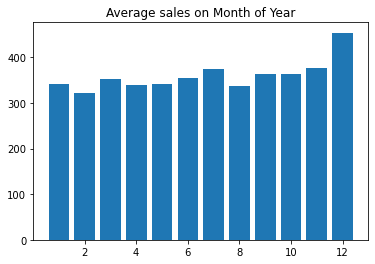

In [34]:
month_group = train['sales'].to_frame()
month_group['moy'] = month_group.index.month
month_group = month_group.groupby('moy').sales.mean().to_frame()
plt.bar(month_group.index,month_group['sales'])
plt.title('Average sales on Month of Year')
plt.show()

as we can see that during December the sales is very good

In [35]:
holiday_data

,type,locale,locale_name,description,transferred
date,,,,,
2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...
2017-12-22,Additional,National,Ecuador,Navidad-3,False
2017-12-23,Additional,National,Ecuador,Navidad-2,False
2017-12-24,Additional,National,Ecuador,Navidad-1,False


In [36]:
h_df = holiday_data.copy()
h_df['dow'] = h_df.index.dayofweek+1
h_df['work_day'] = True
h_df.loc[h_df['dow']>5, 'work_day'] = False #make work_day false for sat and sun (6/7 in dow)


#make the 'work_day' column False for the "National scale" holiday in weekday
h_df.loc[(h_df['type'] == 'Holiday')& (h_df['locale'].str.contains('National')) ,  'work_day'] = False 
h_df.loc[(h_df['type'] == 'Additional')& (h_df['locale'].str.contains('National')) ,  'work_day'] = False 
h_df.loc[(h_df['type'] == 'Bridge')& (h_df['locale'].str.contains('National')) ,  'work_day'] = False 
h_df.loc[(h_df['type'] == 'Transfer')& (h_df['locale'].str.contains('National')) ,  'work_day'] = False 
h_df.loc[h_df['type'] == 'Work day', 'work_day'] = True 
#some day in the list explicitly stat the workday


# now we can drop locale since the national are non working day and the other local event are still a working day
h_df = h_df.drop('locale', axis = 1)

h_df.head(50)

,type,locale_name,description,transferred,dow,work_day
date,,,,,,
2012-03-02,Holiday,Manta,Fundacion de Manta,False,5,True
2012-04-01,Holiday,Cotopaxi,Provincializacion de Cotopaxi,False,7,False
2012-04-12,Holiday,Cuenca,Fundacion de Cuenca,False,4,True
2012-04-14,Holiday,Libertad,Cantonizacion de Libertad,False,6,False
2012-04-21,Holiday,Riobamba,Cantonizacion de Riobamba,False,6,False
2012-05-12,Holiday,Puyo,Cantonizacion del Puyo,False,6,False
2012-06-23,Holiday,Guaranda,Cantonizacion de Guaranda,False,6,False
2012-06-25,Holiday,Imbabura,Provincializacion de Imbabura,False,1,True
2012-06-25,Holiday,Latacunga,Cantonizacion de Latacunga,False,1,True


In [37]:
ny_dic = {'type': 'Holiday','locale':'National','locale_name':'Ecuador','description': 'New Year Day','transferred':'False'}
ny_date = pd.to_datetime(['2012-01-01','2013-01-01','2014-01-01','2015-01-01','2016-01-01','2017-01-01','2018-01-01'])

In [38]:
for date in ny_date:
    holiday_data.loc[date] = ['Holiday','National', 'Ecuador', 'New Year day','False']

In [39]:
h_df.where(h_df['transferred'] == True).dropna()

,type,locale_name,description,transferred,dow,work_day
date,,,,,,
2012-10-09,Holiday,Ecuador,Independencia de Guayaquil,1.0,2.0,0.0
2013-10-09,Holiday,Ecuador,Independencia de Guayaquil,1.0,3.0,0.0
2014-10-09,Holiday,Ecuador,Independencia de Guayaquil,1.0,4.0,0.0
2016-05-24,Holiday,Ecuador,Batalla de Pichincha,1.0,2.0,0.0
2016-07-25,Holiday,Guayaquil,Fundacion de Guayaquil,1.0,1.0,1.0
2016-08-10,Holiday,Ecuador,Primer Grito de Independencia,1.0,3.0,0.0
2017-01-01,Holiday,Ecuador,Primer dia del ano,1.0,7.0,0.0
2017-04-12,Holiday,Cuenca,Fundacion de Cuenca,1.0,3.0,1.0
2017-05-24,Holiday,Ecuador,Batalla de Pichincha,1.0,3.0,0.0


In [40]:
h_df.loc[(h_df['transferred'] == True), 'work_day'] = True
#h_df.head(50)

In [41]:
h_df.loc[h_df['description'].str.contains('futbol'), 'description'] = 'Football'
h_df.loc[h_df['description'].str.contains('Terremoto'), 'description'] = 'Earthquake'

In [42]:
sales = train.groupby('date').sales.sum()
event = h_df[h_df['type']=='Event']

event_merge = event.merge(sales,how='left',left_index=True,right_index=True)
event_merge.head()

,type,locale_name,description,transferred,dow,work_day,sales
date,,,,,,,
2013-05-12,Event,Ecuador,Dia de la Madre,False,7,False,387860.505015
2014-05-11,Event,Ecuador,Dia de la Madre,False,7,False,454512.928937
2014-06-12,Event,Ecuador,Football,False,4,True,329408.067360
2014-06-15,Event,Ecuador,Football,False,7,False,441279.933994
2014-06-20,Event,Ecuador,Football,False,5,True,369206.789547


In [43]:
print('mean of daily sale across country: {}'.format(train.groupby('date').sales.sum().mean()))
print('--------------------')
print(('mean of sale across country in event day: {}'.format(event_merge.groupby('description').sales.mean())))

mean of daily sale across country: 637556.3849186875
--------------------
mean of sale across country in event day: description
Black Friday       647508.781658
Cyber Monday       777344.484674
Dia de la Madre    621092.051781
Earthquake         881919.056300
Football           554139.887353
Name: sales, dtype: float64


In [44]:
train_data

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [45]:
print(min(train_data['date']))
print(max(train_data['date']))

2013-01-01
2017-08-15


In [46]:
object_cols = [cname for cname in train_data.columns 
               if train_data[cname].dtype == "object" 
               and cname != "date"]

print("Categorical variables:")
object_cols 

Categorical variables:


['family']

In [47]:
num_cols = [cname for cname in train_data.columns 
            if train_data[cname].dtype in ['int64', 'float64']]

print("Numerical variables:")
num_cols 

Numerical variables:


['id', 'store_nbr', 'sales', 'onpromotion']

In [48]:
all_cols = num_cols + object_cols
print(all_cols)

['id', 'store_nbr', 'sales', 'onpromotion', 'family']


In [49]:
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
train_data[object_cols] = ordinal_encoder.fit_transform(train_data[object_cols])
train_data

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,0.0,0.000,0
1,1,2013-01-01,1,1.0,0.000,0
2,2,2013-01-01,1,2.0,0.000,0
3,3,2013-01-01,1,3.0,0.000,0
4,4,2013-01-01,1,4.0,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,28.0,438.133,0
3000884,3000884,2017-08-15,9,29.0,154.553,1
3000885,3000885,2017-08-15,9,30.0,2419.729,148
3000886,3000886,2017-08-15,9,31.0,121.000,8


In [50]:
scaler = MinMaxScaler(feature_range=(0,1))

for col in num_cols:
    scaled_data = scaler.fit_transform(train_data[col].values.reshape(-1,1))
    train_data[col] = pd.Series(scaled_data.flatten())

train_data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0.000000e+00,2013-01-01,0.0,0.0,0.0,0.0
1,3.332348e-07,2013-01-01,0.0,1.0,0.0,0.0
2,6.664696e-07,2013-01-01,0.0,2.0,0.0,0.0
3,9.997044e-07,2013-01-01,0.0,3.0,0.0,0.0
4,1.332939e-06,2013-01-01,0.0,4.0,0.0,0.0


In [51]:
train_data = train_data.groupby(['date']).agg({'sales':'mean', 'onpromotion':'mean'})
train_data.head(31)

,sales,onpromotion
date,,
2013-01-01,0.000011,0.0
2013-01-02,0.002232,0.0
2013-01-03,0.001626,0.0
2013-01-04,0.001595,0.0
2013-01-05,0.002148,0.0
2013-01-06,0.002338,0.0
2013-01-07,0.001512,0.0
2013-01-08,0.001432,0.0
2013-01-09,0.001361,0.0


In [52]:
train_data.shape

(1684, 2)

In [53]:
x_train = train_data.copy()
y_train = train_data.sales.copy()

In [54]:
len(x_train.columns)

2

In [55]:
from keras.preprocessing.sequence import TimeseriesGenerator

num_feature_input = len(x_train.columns) # 2 
history_input = 30

"""
length: Number of past time steps to be included, 
batch_size: The amount of predicted days. Here we have 1 since we are trying to predict the next day using the last 30 days.
"""

generator = TimeseriesGenerator(x_train, y_train, length=history_input, batch_size = 1)

# Print the first sequence, you should see 30 past day (x) for 1 predicted day (y)
for i in range(len(generator)):
    x , y = generator[i]
    print('%s => %s' % (x , y))
    break

[[[1.13010918e-05 0.00000000e+00]
  [2.23218011e-03 0.00000000e+00]
  [1.62640375e-03 0.00000000e+00]
  [1.59490009e-03 0.00000000e+00]
  [2.14784868e-03 0.00000000e+00]
  [2.33838232e-03 0.00000000e+00]
  [1.51239286e-03 0.00000000e+00]
  [1.43241371e-03 0.00000000e+00]
  [1.36124486e-03 0.00000000e+00]
  [1.16529593e-03 0.00000000e+00]
  [1.30368188e-03 0.00000000e+00]
  [1.81447030e-03 0.00000000e+00]
  [2.09065264e-03 0.00000000e+00]
  [1.31992821e-03 0.00000000e+00]
  [1.34594081e-03 0.00000000e+00]
  [1.43241432e-03 0.00000000e+00]
  [1.20361619e-03 0.00000000e+00]
  [1.33244809e-03 0.00000000e+00]
  [1.94586381e-03 0.00000000e+00]
  [2.07469660e-03 0.00000000e+00]
  [1.40030279e-03 0.00000000e+00]
  [1.33282550e-03 0.00000000e+00]
  [1.27452842e-03 0.00000000e+00]
  [1.11248811e-03 0.00000000e+00]
  [1.30496464e-03 0.00000000e+00]
  [1.86190230e-03 0.00000000e+00]
  [1.93664941e-03 0.00000000e+00]
  [1.28443510e-03 0.00000000e+00]
  [1.19007398e-03 0.00000000e+00]
  [1.26464150e

In [56]:
#generator.shape

In [57]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, RepeatVector, TimeDistributed

def Multi_Step_LSTM_model():
    
    # Use Keras sequential model
    model = Sequential()    
    
    # First LSTM layer with Dropout regularisation; Set return_sequences to True to feed outputs to next layer
    model.add(LSTM(units = 50, activation='relu', return_sequences = True, input_shape = (history_input, num_feature_input))) 
    model.add(Dropout(0.2))
    
    # Second LSTM layer with Dropout regularisation; Set return_sequences to True to feed outputs to next layer
    model.add(LSTM(units = 50,  activation='relu', return_sequences = True))                                    
    model.add(Dropout(0.2))
    
    # Final LSTM layer with Dropout regularisation; Set return_sequences to False since now we will be predicting with the output layer
    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    
    # The output layer with linear activation to predict Open stock price
    model.add(Dense(units=1, activation = "linear"))
    
    return model

In [58]:
model = Multi_Step_LSTM_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 50)            10600     
_________________________________________________________________
dropout (Dropout)            (None, 30, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 5

In [59]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['mae', 'MeanAbsoluteError'])

In [60]:
model.fit_generator(generator, steps_per_epoch=len(generator), epochs=20, verbose=2)

D:\Anaconda\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1654/1654 - 47s - loss: 5.2955e-06 - mae: 0.0018 - mean_absolute_error: 0.0018
Epoch 2/20
1654/1654 - 28s - loss: 2.3447e-06 - mae: 0.0012 - mean_absolute_error: 0.0012
Epoch 3/20
1654/1654 - 27s - loss: 1.7159e-06 - mae: 0.0011 - mean_absolute_error: 0.0011
Epoch 4/20
1654/1654 - 28s - loss: 1.6676e-06 - mae: 0.0010 - mean_absolute_error: 0.0010
Epoch 5/20
1654/1654 - 27s - loss: 1.5761e-06 - mae: 0.0010 - mean_absolute_error: 0.0010
Epoch 6/20
1654/1654 - 28s - loss: 1.5514e-06 - mae: 0.0010 - mean_absolute_error: 0.0010
Epoch 7/20
1654/1654 - 29s - loss: 1.4973e-06 - mae: 9.8624e-04 - mean_absolute_error: 9.8624e-04
Epoch 8/20
1654/1654 - 28s - loss: 1.5260e-06 - mae: 9.9184e-04 - mean_absolute_error: 9.9184e-04
Epoch 9/20
1654/1654 - 29s - loss: 1.4913e-06 - mae: 9.8310e-04 - mean_absolute_error: 9.8310e-04
Epoch 10/20
1654/1654 - 31s - loss: 1.5383e-06 - mae: 9.9489e-04 - mean_absolute_error: 9.9489e-04
Epoch 11/20
1654/1654 - 27s - loss: 1.5192e-06 - mae: 9.8825e-04 - 

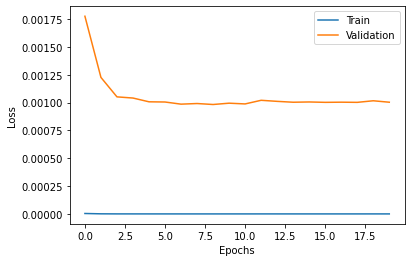

In [61]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['mae'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train', 'Validation'])
plt.show()

In [64]:
test_data

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


# https://www.kaggle.com/code/minhajulhoque/deep-learning-multivariate-rnn-lstm-network

In [65]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
transaction_data = pd.read_csv("transactions.csv")


In [66]:
df_train = train_data
df_test = test_data

In [67]:
df_train["family"].nunique(dropna=True)


33

In [68]:
df_test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [69]:
# dropping the onpromotion coz it won't be used

train_data = df_train.copy().drop(['onpromotion'], axis=1)
test_data = df_test.copy().drop(['onpromotion'], axis=1)

In [70]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

In [71]:
ordinal_encoder = OrdinalEncoder(dtype=int)
train_data[['family']] = ordinal_encoder.fit_transform(train_data[['family']])
test_data[['family']] = ordinal_encoder.transform(test_data[['family']])

In [72]:
train_data

,id,date,store_nbr,family,sales
0,0,2013-01-01,1,0,0.000
1,1,2013-01-01,1,1,0.000
2,2,2013-01-01,1,2,0.000
3,3,2013-01-01,1,3,0.000
4,4,2013-01-01,1,4,0.000
...,...,...,...,...,...
3000883,3000883,2017-08-15,9,28,438.133
3000884,3000884,2017-08-15,9,29,154.553
3000885,3000885,2017-08-15,9,30,2419.729
3000886,3000886,2017-08-15,9,31,121.000


In [73]:
#counting number of days
n_o_days_train=train_data["date"].nunique(dropna = False) 
print('number of day train:',n_o_days_train)

# number of store
n_o_stores_train=train_data["store_nbr"].nunique(dropna = False) 
print('number of stores train:',n_o_stores_train)

# number of family
n_o_families_train=train_data["family"].nunique(dropna = False) 
print('number of family/type of prod train:',n_o_families_train)

number of day train: 1684
number of stores train: 54
number of family/type of prod train: 33


In [74]:
##counting the number of days
n_o_days_test=test_data["date"].nunique(dropna = False) 
print('number of day test:',n_o_days_test)

# number of store
n_o_stores_test=test_data["store_nbr"].nunique(dropna = False) 
print('number of stores test:',n_o_stores_test)

# number of family
n_o_families_test=test_data["family"].nunique(dropna = False) 
print('number of family/type of prod test:',n_o_families_test)

number of day test: 16
number of stores test: 54
number of family/type of prod test: 33


The data need to be re-organized as discrete-time data (days) date as timestamp/time-series input, store number and family as columns and sales is the numerical data of interest for RNN

In [75]:
pivoted_train = train_data.pivot(index=['date'], columns=['store_nbr', 'family'], values='sales')
pivoted_train.head()

store_nbr     1                                                               \
family       0    1    2       3    4        5    6       7      8        9    
date                                                                           
2013-01-01  0.0  0.0  0.0     0.0  0.0    0.000  0.0     0.0    0.0    0.000   
2013-01-02  2.0  0.0  2.0  1091.0  0.0  470.652  0.0  1060.0  579.0  164.069   
2013-01-03  3.0  0.0  0.0   919.0  0.0  310.655  0.0   836.0  453.0  151.582   
2013-01-04  3.0  0.0  3.0   953.0  0.0  198.366  0.0   827.0  460.0  131.411   
2013-01-05  5.0  0.0  3.0  1160.0  0.0  301.057  0.0   811.0  464.0  118.613   

store_nbr   ...    9                                                     \
family      ...   23       24     25   26   27       28    29   30   31   
date        ...                                                           
2013-01-01  ...  0.0    0.000    0.0  0.0  0.0    0.000   0.0  0.0  0.0   
2013-01-02  ...  0.0  374.531  482.0  0.0  0.0  651.292  83.0  0.0  0.0   
2013-01-03  ...  0.0  400.863  372.0  0.0  0.0  509.496  66.0  0.0  0.0   
2013-01-04  ...  0.0  310.878  324.0  0.0  0.0  332.672  57.0  0.0  0.0   
2013-01-05  ...  0.0  447.685  461.0  0.0  0.0  510.919  84.0  0.0  0.0   

store_nbr           
family          32  
date                
2013-01-01   0.000  
2013-01-02  29.214  
2013-01-03  25.000  
2013-01-04  11.000  
2013-01-05  28.361  

[5 rows x 1782 columns]

In [76]:
pivoted_train[1][0]

date
2013-01-01    0.0
2013-01-02    2.0
2013-01-03    3.0
2013-01-04    3.0
2013-01-05    5.0
             ... 
2017-08-11    1.0
2017-08-12    6.0
2017-08-13    1.0
2017-08-14    1.0
2017-08-15    4.0
Name: 0, Length: 1684, dtype: float64

## Splitting the data into train and validation

In [77]:
train_samples = int(n_o_days_train*0.95)
train_samples

1599

In [78]:
train_samples_df = pivoted_train[:train_samples]
train_samples_df

store_nbr     1                                                                \
family       0    1    2       3    4        5     6       7      8        9    
date                                                                            
2013-01-01  0.0  0.0  0.0     0.0  0.0    0.000   0.0     0.0    0.0    0.000   
2013-01-02  2.0  0.0  2.0  1091.0  0.0  470.652   0.0  1060.0  579.0  164.069   
2013-01-03  3.0  0.0  0.0   919.0  0.0  310.655   0.0   836.0  453.0  151.582   
2013-01-04  3.0  0.0  3.0   953.0  0.0  198.366   0.0   827.0  460.0  131.411   
2013-01-05  5.0  0.0  3.0  1160.0  0.0  301.057   0.0   811.0  464.0  118.613   
...         ...  ...  ...     ...  ...      ...   ...     ...    ...      ...   
2017-05-18  4.0  0.0  2.0  2154.0  0.0  350.502  12.0   669.0  718.0  132.686   
2017-05-19  5.0  0.0  4.0  2743.0  0.0  481.324  24.0   826.0  957.0  177.191   
2017-05-20  4.0  0.0  3.0  2379.0  0.0  392.965   7.0   588.0  795.0  140.261   
2017-05-21  1.0  0.0  1.0   974.0  0.0  161.529   1.0   243.0  337.0   75.683   
2017-05-22  2.0  0.0  5.0  2620.0  1.0  418.029  16.0   712.0  754.0  129.027   

store_nbr   ...    9                                                       \
family      ...   23         24     25    26    27         28          29   
date        ...                                                             
2013-01-01  ...  0.0    0.00000    0.0   0.0   0.0    0.00000    0.000000   
2013-01-02  ...  0.0  374.53100  482.0   0.0   0.0  651.29200   83.000000   
2013-01-03  ...  0.0  400.86300  372.0   0.0   0.0  509.49600   66.000000   
2013-01-04  ...  0.0  310.87800  324.0   0.0   0.0  332.67200   57.000000   
2013-01-05  ...  0.0  447.68500  461.0   0.0   0.0  510.91900   84.000000   
...         ...  ...        ...    ...   ...   ...        ...         ...   
2017-05-18  ...  4.0  541.15700  344.0  19.0  12.0  313.56600   73.060000   
2017-05-19  ...  2.0  264.74400  268.0   6.0   8.0  477.29602   79.421000   
2017-05-20  ...  5.0  373.00400  569.0  10.0  12.0  503.79500  151.274000   
2017-05-21  ...  2.0  492.31302  636.0  10.0  18.0  688.77600  149.067000   
2017-05-22  ...  4.0  319.78200  345.0   8.0   9.0  321.63200  111.423004   

store_nbr                              
family             30   31         32  
date                                   
2013-01-01     0.0000  0.0   0.000000  
2013-01-02     0.0000  0.0  29.214000  
2013-01-03     0.0000  0.0  25.000000  
2013-01-04     0.0000  0.0  11.000000  
2013-01-05     0.0000  0.0  28.361000  
...               ...  ...        ...  
2017-05-18  1262.8600  7.0  12.544001  
2017-05-19  1149.9869  2.0   9.238000  
2017-05-20  2008.8520  3.0  27.380001  
2017-05-21  2424.7440  7.0  39.710000  
2017-05-22  1413.0350  2.0  19.097000  

[1599 rows x 1782 columns]

In [79]:
valid_samples_df = pivoted_train[train_samples:]
valid_samples_df

store_nbr     1                                                        \
family       0    1    2       3    4          5     6      7      8    
date                                                                    
2017-05-23  4.0  0.0  1.0  2365.0  1.0  413.15200   8.0  822.0  736.0   
2017-05-24  7.0  0.0  1.0  2611.0  1.0  349.68100  11.0  944.0  867.0   
2017-05-25  2.0  0.0  1.0  2229.0  0.0  372.38500  18.0  706.0  723.0   
2017-05-26  1.0  0.0  0.0  1100.0  0.0  190.73300   7.0  303.0  375.0   
2017-05-27  1.0  0.0  2.0  2270.0  0.0  300.78600  10.0  462.0  634.0   
...         ...  ...  ...     ...  ...        ...   ...    ...    ...   
2017-08-11  1.0  0.0  1.0  1006.0  0.0  145.60700   4.0  341.0  343.0   
2017-08-12  6.0  0.0  3.0  1659.0  0.0  243.22000   3.0  351.0  526.0   
2017-08-13  1.0  0.0  1.0   803.0  0.0  136.67900   1.0  169.0  266.0   
2017-08-14  1.0  0.0  6.0  2201.0  0.0  346.03800   4.0  571.0  699.0   
2017-08-15  4.0  0.0  4.0  1942.0  0.0  329.54102  21.0  703.0  602.0   

store_nbr            ...     9                                         \
family           9   ...    23       24     25    26    27         28   
date                 ...                                                
2017-05-23  127.909  ...   1.0  284.679  340.0   5.0  12.0  328.32900   
2017-05-24  166.068  ...   1.0  318.254  292.0   6.0  12.0  360.76498   
2017-05-25  122.562  ...   1.0  415.299  260.0   7.0  10.0  261.97600   
2017-05-26   82.697  ...   5.0  378.795  382.0   9.0   9.0  533.20300   
2017-05-27   99.587  ...   3.0  412.021  455.0   8.0  11.0  541.38000   
...             ...  ...   ...      ...    ...   ...   ...        ...   
2017-08-11   64.302  ...   5.0  309.245  373.0  11.0   2.0  525.22400   
2017-08-12   99.488  ...   2.0  260.298  400.0   7.0  10.0  383.38700   
2017-08-13   47.770  ...   3.0  327.206  510.0   2.0   9.0  412.45800   
2017-08-14  154.578  ...  12.0  330.975  445.0   2.0  14.0  283.42900   
2017-08-15  116.402  ...  11.0  449.228  522.0   6.0   6.0  438.13300   

store_nbr                                           
family             29         30     31         32  
date                                                
2017-05-23  127.40600  2268.3320    1.0  16.063000  
2017-05-24  104.61800  1180.0780    2.0  18.163000  
2017-05-25  110.95700   920.1430    5.0   2.994000  
2017-05-26  169.91900  1515.1750   13.0  20.683000  
2017-05-27  134.74800  1634.6849    5.0  43.512000  
...               ...        ...    ...        ...  
2017-08-11  112.10000  1453.0780  140.0  23.831000  
2017-08-12  129.90399  1419.2640  138.0  16.859001  
2017-08-13  105.16900  1693.6070  200.0  20.000000  
2017-08-14  114.12000  1348.4250  182.0  17.000000  
2017-08-15  154.55300  2419.7290  121.0  16.000000  

[85 rows x 1782 columns]

### Scaling the data

In [80]:
minmax = MinMaxScaler()
minmax.fit(train_samples_df)

scaled_train_samples = minmax.transform(train_samples_df)
scaled_val_samples = minmax.transform(valid_samples_df)

In [81]:
scaled_train_samples[10:]

array([[0.16666667, 0.        , 0.16666667, ..., 0.        , 0.        ,
        0.1939255 ],
       [0.11111111, 0.        , 0.        , ..., 0.        , 0.        ,
        0.32272206],
       [0.11111111, 0.        , 0.        , ..., 0.        , 0.        ,
        0.24110331],
       ...,
       [0.22222222, 0.        , 0.25      , ..., 0.49480247, 0.00920245,
        0.45467379],
       [0.05555556, 0.        , 0.08333333, ..., 0.59724127, 0.02147239,
        0.65942643],
       [0.11111111, 0.        , 0.41666667, ..., 0.34804615, 0.00613497,
        0.31712582]])

In [82]:
scaled_val_samples[10:]

array([[1.05555556, 0.        , 0.08333333, ..., 0.35775819, 0.01840491,
        0.1826666 ],
       [0.44444444, 0.        , 0.08333333, ..., 0.49624388, 0.01533742,
        0.48497982],
       [0.        , 0.        , 0.16666667, ..., 0.62189011, 0.05214724,
        0.78270978],
       ...,
       [0.05555556, 0.        , 0.08333333, ..., 0.41715414, 0.61349693,
        0.33212109],
       [0.05555556, 0.        , 0.5       , ..., 0.33213199, 0.55828221,
        0.28230293],
       [0.22222222, 0.        , 0.33333333, ..., 0.59600602, 0.37116564,
        0.26569687]])

sliding window for converting series to sample to be used with supervised learning algorithm

In [83]:
# n_past --> no. of past observations
# n_future --> no.of past observations

def split_series(series, n_past, n_future):
    X, y = list(), list()
    for window_start in range(len(series)):
        past_end = window_start + n_past
        future_end = past_end + n_future
        if future_end > len(series):
            break
            
        # slicing past and future
        past, future = series[window_start:past_end,:], series[past_end:future_end,:]
        X.append(past)
        y.append(future)
    
    return np.array(X), np.array(y)

n_past =16
n_future = 16
n_features = n_o_stores_train * n_o_families_train # num of features

Now converting the data via split_series function

In [84]:
X_train, y_train = split_series(scaled_train_samples, n_past, n_future)
X_val, y_val = split_series(scaled_val_samples, n_past, n_future)

In [85]:
print('X_train.shape',X_train.shape)
print('y_train.shape',y_train.shape)
print('X_val.shape',X_val.shape)
print('y_val.shape',y_val.shape)

X_train.shape (1568, 16, 1782)
y_train.shape (1568, 16, 1782)
X_val.shape (54, 16, 1782)
y_val.shape (54, 16, 1782)


# Traning the model - LSTM

In [86]:
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.layers import Dropout, BatchNormalization, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [87]:
model = Sequential()

model.add(LSTM(units=256, return_sequences=True,input_shape=[n_past, n_features]))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(LSTM(units=128, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))
#TimeDistributed layer
model.add(TimeDistributed(Dense(n_features)))

model.compile(loss="mae", optimizer=Adam(learning_rate=0.001), metrics=['mae'])

In [88]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 16, 256)           2087936   
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 256)           1024      
_________________________________________________________________
dropout (Dropout)            (None, 16, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 16, 128)           197120    
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 128)           512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 128)           0         
_________________________________________________________________
time_distributed (TimeDistri (None, 16, 1782)          2

In [89]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_mae', 
                           min_delta=0.0001,
                           patience=100,
                           restore_best_weights=True)

epochs= 1000

model_history = model.fit(X_train, y_train, 
                          validation_data=(X_val, y_val),
                          epochs = epochs,
                          callbacks = [early_stop],
                          batch_size=512,
                          shuffle=True)

Epoch 1/1000
4/4 [==============================] - 7s 828ms/step - loss: 0.3600 - mae: 0.3600 - val_loss: 0.2396 - val_mae: 0.2396
Epoch 2/1000
4/4 [==============================] - 3s 611ms/step - loss: 0.2711 - mae: 0.2711 - val_loss: 0.2367 - val_mae: 0.2367
Epoch 3/1000
4/4 [==============================] - 3s 605ms/step - loss: 0.2426 - mae: 0.2426 - val_loss: 0.2357 - val_mae: 0.2357
Epoch 4/1000
4/4 [==============================] - 2s 576ms/step - loss: 0.2291 - mae: 0.2291 - val_loss: 0.2313 - val_mae: 0.2313
Epoch 5/1000
4/4 [==============================] - 2s 570ms/step - loss: 0.2190 - mae: 0.2190 - val_loss: 0.2279 - val_mae: 0.2279
Epoch 6/1000
4/4 [==============================] - 2s 571ms/step - loss: 0.2111 - mae: 0.2111 - val_loss: 0.2228 - val_mae: 0.2228
Epoch 7/1000
4/4 [==============================] - 2s 566ms/step - loss: 0.2031 - mae: 0.2031 - val_loss: 0.2159 - val_mae: 0.2159
Epoch 8/1000
4/4 [==============================] - 2s 567ms/step - loss: 0.

4/4 [==============================] - 3s 756ms/step - loss: 0.0605 - mae: 0.0605 - val_loss: 0.1057 - val_mae: 0.1057
Epoch 63/1000
4/4 [==============================] - 3s 701ms/step - loss: 0.0630 - mae: 0.0630 - val_loss: 0.0923 - val_mae: 0.0923
Epoch 64/1000
4/4 [==============================] - 3s 687ms/step - loss: 0.0643 - mae: 0.0643 - val_loss: 0.0955 - val_mae: 0.0955
Epoch 65/1000
4/4 [==============================] - 3s 722ms/step - loss: 0.0618 - mae: 0.0618 - val_loss: 0.0941 - val_mae: 0.0941
Epoch 66/1000
4/4 [==============================] - 3s 750ms/step - loss: 0.0604 - mae: 0.0604 - val_loss: 0.0852 - val_mae: 0.0852
Epoch 67/1000
4/4 [==============================] - ETA: 0s - loss: 0.0598 - mae: 0.059 - 3s 664ms/step - loss: 0.0598 - mae: 0.0598 - val_loss: 0.0844 - val_mae: 0.0844
Epoch 68/1000
4/4 [==============================] - 3s 670ms/step - loss: 0.0595 - mae: 0.0595 - val_loss: 0.0847 - val_mae: 0.0847
Epoch 69/1000
4/4 [==========================

4/4 [==============================] - 3s 638ms/step - loss: 0.0472 - mae: 0.0472 - val_loss: 0.0813 - val_mae: 0.0813
Epoch 124/1000
4/4 [==============================] - 3s 637ms/step - loss: 0.0473 - mae: 0.0473 - val_loss: 0.0812 - val_mae: 0.0812
Epoch 125/1000
4/4 [==============================] - 3s 636ms/step - loss: 0.0471 - mae: 0.0471 - val_loss: 0.0832 - val_mae: 0.0832
Epoch 126/1000
4/4 [==============================] - 3s 638ms/step - loss: 0.0470 - mae: 0.0470 - val_loss: 0.0808 - val_mae: 0.0808
Epoch 127/1000
4/4 [==============================] - 3s 641ms/step - loss: 0.0469 - mae: 0.0469 - val_loss: 0.0805 - val_mae: 0.0805
Epoch 128/1000
4/4 [==============================] - 3s 637ms/step - loss: 0.0468 - mae: 0.0468 - val_loss: 0.0815 - val_mae: 0.0815
Epoch 129/1000
4/4 [==============================] - 3s 641ms/step - loss: 0.0466 - mae: 0.0466 - val_loss: 0.0804 - val_mae: 0.0804
Epoch 130/1000
4/4 [==============================] - 3s 643ms/step - loss: 0

4/4 [==============================] - 3s 713ms/step - loss: 0.0442 - mae: 0.0442 - val_loss: 0.0744 - val_mae: 0.0744
Epoch 185/1000
4/4 [==============================] - 3s 695ms/step - loss: 0.0442 - mae: 0.0442 - val_loss: 0.0739 - val_mae: 0.0739
Epoch 186/1000
4/4 [==============================] - 3s 717ms/step - loss: 0.0441 - mae: 0.0441 - val_loss: 0.0736 - val_mae: 0.0736
Epoch 187/1000
4/4 [==============================] - 3s 740ms/step - loss: 0.0440 - mae: 0.0440 - val_loss: 0.0739 - val_mae: 0.0739
Epoch 188/1000
4/4 [==============================] - 3s 774ms/step - loss: 0.0440 - mae: 0.0440 - val_loss: 0.0741 - val_mae: 0.0741
Epoch 189/1000
4/4 [==============================] - 3s 799ms/step - loss: 0.0440 - mae: 0.0440 - val_loss: 0.0736 - val_mae: 0.0736
Epoch 190/1000
4/4 [==============================] - 4s 804ms/step - loss: 0.0441 - mae: 0.0441 - val_loss: 0.0742 - val_mae: 0.0742
Epoch 191/1000
4/4 [==============================] - 3s 713ms/step - loss: 0

4/4 [==============================] - 3s 685ms/step - loss: 0.0428 - mae: 0.0428 - val_loss: 0.0740 - val_mae: 0.0740
Epoch 246/1000
4/4 [==============================] - 3s 684ms/step - loss: 0.0428 - mae: 0.0428 - val_loss: 0.0738 - val_mae: 0.0738
Epoch 247/1000
4/4 [==============================] - 3s 715ms/step - loss: 0.0428 - mae: 0.0428 - val_loss: 0.0737 - val_mae: 0.0737
Epoch 248/1000
4/4 [==============================] - 3s 798ms/step - loss: 0.0427 - mae: 0.0427 - val_loss: 0.0742 - val_mae: 0.0742
Epoch 249/1000
4/4 [==============================] - 3s 712ms/step - loss: 0.0427 - mae: 0.0427 - val_loss: 0.0742 - val_mae: 0.0742
Epoch 250/1000
4/4 [==============================] - 3s 664ms/step - loss: 0.0428 - mae: 0.0428 - val_loss: 0.0733 - val_mae: 0.0733
Epoch 251/1000
4/4 [==============================] - 3s 723ms/step - loss: 0.0425 - mae: 0.0425 - val_loss: 0.0746 - val_mae: 0.0746
Epoch 252/1000
4/4 [==============================] - 3s 721ms/step - loss: 0

4/4 [==============================] - 3s 654ms/step - loss: 0.0418 - mae: 0.0418 - val_loss: 0.0751 - val_mae: 0.0751
Epoch 307/1000
4/4 [==============================] - 3s 646ms/step - loss: 0.0418 - mae: 0.0418 - val_loss: 0.0751 - val_mae: 0.0751
Epoch 308/1000
4/4 [==============================] - 3s 629ms/step - loss: 0.0417 - mae: 0.0417 - val_loss: 0.0781 - val_mae: 0.0781
Epoch 309/1000
4/4 [==============================] - 3s 624ms/step - loss: 0.0416 - mae: 0.0416 - val_loss: 0.0754 - val_mae: 0.0754
Epoch 310/1000
4/4 [==============================] - 3s 633ms/step - loss: 0.0416 - mae: 0.0416 - val_loss: 0.0750 - val_mae: 0.0750
Epoch 311/1000
4/4 [==============================] - 3s 644ms/step - loss: 0.0416 - mae: 0.0416 - val_loss: 0.0767 - val_mae: 0.0767
Epoch 312/1000
4/4 [==============================] - 3s 647ms/step - loss: 0.0418 - mae: 0.0418 - val_loss: 0.0743 - val_mae: 0.0743
Epoch 313/1000
4/4 [==============================] - 3s 643ms/step - loss: 0

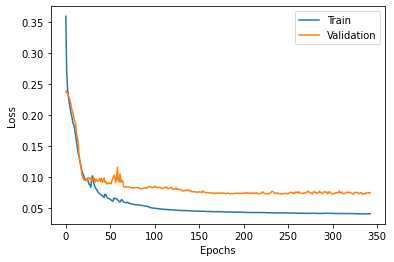

In [90]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_mae'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train', 'Validation'])
plt.show()

In [91]:
X_test_pred = scaled_val_samples[-n_past:,:].reshape((1, n_past, n_features))
print(X_test_pred.shape)
scaled_test_predict = model.predict(X_test_pred)

(1, 16, 1782)


In [92]:
scaled_test_predict.shape

(1, 16, 1782)

In [93]:
model_history.history

{'loss': [0.3600482642650604,
  0.2710909843444824,
  0.24263672530651093,
  0.22912833094596863,
  0.2189653366804123,
  0.21111571788787842,
  0.20308025181293488,
  0.19672417640686035,
  0.18734876811504364,
  0.18460878729820251,
  0.1771814227104187,
  0.16770870983600616,
  0.1590561419725418,
  0.14851723611354828,
  0.13780063390731812,
  0.13473990559577942,
  0.12372465431690216,
  0.11854003369808197,
  0.11037525534629822,
  0.10678286105394363,
  0.10365220159292221,
  0.09825421124696732,
  0.09519661962985992,
  0.09772592037916183,
  0.09502904117107391,
  0.09489808976650238,
  0.0893164575099945,
  0.08813904970884323,
  0.08432386070489883,
  0.09699206799268723,
  0.10269723832607269,
  0.09502255171537399,
  0.08742842078208923,
  0.08407679200172424,
  0.08161171525716782,
  0.07985114306211472,
  0.07670996338129044,
  0.07513462007045746,
  0.07362806797027588,
  0.07279636710882187,
  0.07151073217391968,
  0.07021552324295044,
  0.06983745098114014,
  0.06766

In [94]:
print('-------------------- Evaluation on Training Data --------------------')
for item in model_history.history:
    print("Final", item, ":", model_history.history[item][-1])
print("")


-------------------- Evaluation on Training Data --------------------
Final loss : 0.041403718292713165
Final mae : 0.041403718292713165
Final val_loss : 0.07572845369577408
Final val_mae : 0.07572845369577408



In [106]:
print('-------------------- Evaluation on Test Data --------------------')
model.evaluate(X_val, y_val)

-------------------- Evaluation on Test Data --------------------
2/2 [==============================] - 0s 24ms/step - loss: 0.0731 - mae: 0.0731


[0.07305838167667389, 0.07305838167667389]

In [96]:
X_train_pred = scaled_train_samples[-n_past:,:].reshape((1, n_past, n_features))
print(X_train_pred.shape)
scaled_train_predict = model.predict(X_test_pred)

(1, 16, 1782)


In [97]:
scaled_train_predict.shape

(1, 16, 1782)

In [98]:
# Inverse transform from the previous min max scaler
y_predict = pd.DataFrame(minmax.inverse_transform(scaled_test_predict.reshape((n_future, n_features))),columns=valid_samples_df.columns)

In [99]:
y_predict

store_nbr         1                                                         \
family           0         1         2            3         4           5    
0          3.463420  0.001860  2.893502  2402.625732  0.004100  469.228729   
1          2.647945  0.001790  2.692467  1931.401611  0.010774  382.689728   
2          3.554158  0.002227  2.944708  2280.262207  0.008225  400.859985   
3          3.749065  0.003189  3.241255  2380.842529  0.007077  388.530304   
4          1.299588  0.004371  1.692591  1152.017334  0.007436  153.416229   
5          3.244045  0.001809  3.061449  2271.625732  0.018052  409.900360   
6          2.574034  0.001839  2.768868  1923.655029  0.012597  354.805481   
7          3.107566  0.001691  3.219123  2345.938232  0.014438  441.916748   
8          2.712727  0.000762  3.315745  2188.555664  0.025175  428.619812   
9          3.600652  0.001435  3.157569  2434.944336  0.024944  417.818115   
10         3.480695  0.001982  3.078097  2328.724365  0.020147  392.983643   
11         1.260190  0.003026  1.874858  1296.266724  0.016949  204.508514   
12         2.748112  0.001850  2.897818  1905.779907  0.016435  333.741638   
13         3.156799  0.000986  3.128966  2164.413574  0.020487  407.441132   
14         3.268415  0.000991  3.183329  2302.333496  0.017751  440.262390   
15         2.646590  0.001293  3.126770  2032.102661  0.018455  387.358368   

store_nbr                                                 ...         9  \
family            6           7           8           9   ...        23   
0          14.251268  786.846619  904.713562  143.662201  ...  3.043545   
1          15.283115  617.153564  680.020813  114.025429  ...  3.400476   
2          15.222116  687.097656  794.546021  145.020645  ...  3.654192   
3          12.155337  570.119202  780.935730  131.860443  ...  5.493915   
4           3.723051  230.313263  365.505676   62.232445  ...  5.909026   
5          11.539178  660.453491  766.999207  139.896072  ...  3.457604   
6          12.553820  604.110168  639.405396  117.772415  ...  3.579068   
7          13.551405  749.134888  834.312683  142.577972  ...  3.014868   
8          17.023415  686.233643  722.122131  126.235245  ...  2.462389   
9          17.659834  700.268982  818.402405  160.629745  ...  3.533161   
10         12.950894  576.182434  767.759827  136.267715  ...  4.602068   
11          6.892228  316.454620  437.389679   81.111298  ...  4.669900   
12         11.189470  535.176392  654.883118  121.332375  ...  3.563594   
13         13.637370  673.953613  756.643127  138.243912  ...  2.585301   
14         15.054416  745.366028  825.783142  146.437012  ...  2.425061   
15         14.918900  630.657715  717.917297  125.433273  ...  3.073109   

store_nbr                                                            \
family             24          25         26         27          28   
0          352.036713  448.132904   6.971860  10.563489  388.244141   
1          548.292847  555.179504   7.079529  12.780452  461.297272   
2          387.526978  566.870728   7.955371  12.792249  534.517151   
3          493.092407  815.004517  11.692327  19.863817  654.004883   
4          493.924622  865.775024  13.605008  23.294012  727.287048   
5          403.974213  573.314270   7.774665  13.965031  452.077606   
6          505.324890  681.271301   8.570589  16.136095  518.043274   
7          396.063873  549.466431   7.371741  12.990976  434.737335   
8          551.010132  451.132996   5.391119  11.178406  374.381714   
9          348.339142  481.232605   7.188316  12.313062  505.321564   
10         415.611664  601.408691   9.016994  15.574078  536.185852   
11         434.710663  650.068237   9.677248  17.683599  612.588623   
12         405.945892  595.137207   7.856963  14.597011  555.249390   
13         377.051544  468.636719   6.141119  11.275420  425.054108   
14         348.922363  432.174713   6.158819  10.691454  398.198090   
15         474.446259  551.535217   7

In [100]:
pivoted_test = test_data.pivot(index=['date'], columns=['store_nbr', 'family'], values=None)
pivoted_test

id                                                        \
store_nbr         1                                                         
family           0        1        2        3        4        5        6    
date                                                                        
2017-08-16  3000888  3000889  3000890  3000891  3000892  3000893  3000894   
2017-08-17  3002670  3002671  3002672  3002673  3002674  3002675  3002676   
2017-08-18  3004452  3004453  3004454  3004455  3004456  3004457  3004458   
2017-08-19  3006234  3006235  3006236  3006237  3006238  3006239  3006240   
2017-08-20  3008016  3008017  3008018  3008019  3008020  3008021  3008022   
2017-08-21  3009798  3009799  3009800  3009801  3009802  3009803  3009804   
2017-08-22  3011580  3011581  3011582  3011583  3011584  3011585  3011586   
2017-08-23  3013362  3013363  3013364  3013365  3013366  3013367  3013368   
2017-08-24  3015144  3015145  3015146  3015147  3015148  3015149  3015150   
2017-08-25  3016926  3016927  3016928  3016929  3016930  3016931  3016932   
2017-08-26  3018708  3018709  3018710  3018711  3018712  3018713  3018714   
2017-08-27  3020490  3020491  3020492  3020493  3020494  3020495  3020496   
2017-08-28  3022272  3022273  3022274  3022275  3022276  3022277  3022278   
2017-08-29  3024054  3024055  3024056  3024057  3024058  3024059  3024060   
2017-08-30  3025836  3025837  3025838  3025839  3025840  3025841  3025842   
2017-08-31  3027618  3027619  3027620  3027621  3027622  3027623  3027624   

                                       ...                             \
store_nbr                              ...        9                     
family           7        8        9   ...       23       24       25   
date                                   ...                              
2017-08-16  3000895  3000896  3000897  ...  3002660  3002661  3002662   
2017-08-17  3002677  3002678  3002679  ...  3004442  3004443  3004444   
2017-08-18  3004459  3004460  3004461  ...  3006224  3006225  3006226   
2017-08-19  3006241  3006242  3006243  ...  3008006  3008007  3008008   
2017-08-20  3008023  3008024  3008025  ...  3009788  3009789  3009790   
2017-08-21  3009805  3009806  3009807  ...  3011570  3011571  3011572   
2017-08-22  3011587  3011588  3011589  ...  3013352  3013353  3013354   
2017-08-23  3013369  3013370  3013371  ...  3015134  3015135  3015136   
2017-08-24  3015151  3015152  3015153  ...  3016916  3016917  3016918   
2017-08-25  3016933  3016934  3016935  ...  3018698  3018699  3018700   
2017-08-26  3018715  3018716  3018717  ...  3020480  3020481  3020482   
2017-08-27  3020497  3020498  3020499  ...  3022262  3022263  3022264   
2017-08-28  3022279  3022280  3022281  ...  3024044  3024045  3024046   
2017-08-29  3024061  3024062  3024063  ...  3025826  3025827  3025828   
2017-08-30  3025843  3025844  3025845  ...  3027608  3027609  3027610   
2017-08-31  3027625  3027626  3027627  ...  3029390  3029391  3029392   

                                                                           
store_nbr                                                                  
family           26       27       28       29       30       31       32  
date                                                                       
2017-08-16  3002663  3002664  3002665  3002666  3002667  3002668  3002669  
2017-08-17  3004445  3004446  3004447  3004448  3004449  3004450  3004451  
2017-08-18  3006227  3006228  3006229  3006230  3006231  3006232  3006233  
2017-08-19  3008009  3008010  3008011  3008012  3008013  3008014  3008015  
2017-08-20  3009791  3009792  3009793  3009794  3009795  3009796  3009797  
2017-08-21  3011573  3011574  3011575  3011576  3011577  3011578  3011579  
2017-08-22  3013355  3013356  3013357  3013358  3013359  3013360  3013361  
2017-08-23  3015137  3015138  3015139  3015140  3015141  3015142  3015143  
2017-08-24  3016919  3016920  3016921  3016922  3016923  3016924  3016925  
2017-08-25  3018701  301870

In [101]:
pivoted_test.values

array([[3000888, 3000889, 3000890, ..., 3002667, 3002668, 3002669],
       [3002670, 3002671, 3002672, ..., 3004449, 3004450, 3004451],
       [3004452, 3004453, 3004454, ..., 3006231, 3006232, 3006233],
       ...,
       [3024054, 3024055, 3024056, ..., 3025833, 3025834, 3025835],
       [3025836, 3025837, 3025838, ..., 3027615, 3027616, 3027617],
       [3027618, 3027619, 3027620, ..., 3029397, 3029398, 3029399]],
      dtype=int64)

In [102]:
pivoted_train.values

array([[0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [2.000000e+00, 0.000000e+00, 2.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 2.921400e+01],
       [3.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 2.500000e+01],
       ...,
       [1.000000e+00, 0.000000e+00, 1.000000e+00, ..., 1.693607e+03,
        2.000000e+02, 2.000000e+01],
       [1.000000e+00, 0.000000e+00, 6.000000e+00, ..., 1.348425e+03,
        1.820000e+02, 1.700000e+01],
       [4.000000e+00, 0.000000e+00, 4.000000e+00, ..., 2.419729e+03,
        1.210000e+02, 1.600000e+01]])

# Submitting resulting csv file for Kaggle competition

In [110]:
submission = pd.read_csv('sample_submission.csv')

In [111]:
submission

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0
...,...,...
28507,3029395,0.0
28508,3029396,0.0
28509,3029397,0.0
28510,3029398,0.0


In [107]:
for day_ith, day_ith_pred in y_predict.iterrows(): 
    for n_samples_per_day in range(len(day_ith_pred)): 

        sample_id = pivoted_test.iloc[[day_ith], [n_samples_per_day]].values[0][0] #total number of samples
        values= max(0,day_ith_pred.values[n_samples_per_day]) #price that is negative will be set to 0
        submission.at[sample_id, 'sales'] = values
        print(values)

3.46342
0.0018603542
2.8935018
2402.6257
0.00410014
469.22873
14.251268
786.8466
904.71356
143.6622
158.59038
102.82779
2890.007
20.388695
1.7898959
23.35808
24.63269
0.018556695
189.28944
13.774279
15.753892
5.833016
97.061035
6.4211955
293.72778
154.26018
5.2530184
10.153158
341.91257
100.5356
3618.3767
0.014451464
31.430944
1.9841055
0.00988782
0.8461523
1120.4817
0.00026119943
103.6296
3.1053352
682.6556
330.46265
251.11995
35.70603
28.288652
2527.7598
2.4773147
0.20430769
9.2169695
6.3392715
0.008455643
161.55933
4.6144757
0.016843172
1.2775834
8.716435
0.039975327
142.5177
177.08011
0.5227606
3.2664957
144.14668
28.01563
207.72263
0
1.7442151
6.678727
0.02355484
5.9683037
4300.3843
0
615.1533
11.770897
1942.6989
691.98206
485.15732
121.65344
83.86396
6940.5947
19.105005
0.1865713
34.11585
23.370464
0
498.94888
11.151952
1.4976605
7.055696
35.107517
2.586787
563.636
443.84442
1.9372637
15.520856
424.72406
85.68089
1074.0874
4.768714
8.568483
5.656987
0
0.6839172
1703.9911
0
165.36

32.42259
1.7502999
158.18463
284.74634
2.592178
7.5343094
108.24165
34.28291
620.6675
9.862905
2.9769728
4.218201
0.022888703
0.0052830083
1399.8618
0.005646494
78.95863
2.2715704
416.41287
198.11165
86.96456
134.86572
47.805233
1577.0974
1.764104
0.09887278
8.303518
6.1170278
0.004892368
89.37415
0.001017062
0.047546476
0.00088207424
28.155838
0.06154547
155.12389
68.530594
0.49215183
0.4658622
34.892574
17.441877
247.83606
1.3168573
0.011239127
4.0137773
0.0032852981
1.0548192
2560.5781
0.0041140723
433.6154
5.6339426
820.9117
657.94
193.72571
113.11049
87.18037
3360.4258
3.8209808
0.019088648
25.205648
13.62605
0
195.18747
0
15.05301
1.9510659
49.481194
1.0280629
208.1757
208.41396
2.6565166
5.288724
92.79176
50.26801
1001.1109
11.257523
0.7397467
3.0471227
0.011241309
4.803061
2916.2393
0.034893826
637.82336
10.623259
1078.5338
1079.7314
172.67847
130.19211
151.9429
4052.5156
42.353348
1.5269551
35.39539
20.75077
0.00803001
262.45834
25.056868
24.281282
3.4289277
99.55132
8.990515


726.93976
567.45374
126.338135
93.781944
8130.1655
21.054642
0.36851746
37.72005
24.992682
0
576.4554
11.859967
1.7452934
9.599453
37.66727
3.1749313
864.5682
535.0755
2.0619752
16.387318
399.25586
89.938354
1220.2373
5.498503
10.5489
6.788181
0.011231052
0.7551666
1843.0063
0
187.38757
9.90185
812.8226
481.1285
244.98859
54.042747
42.5776
3019.9019
4.969811
1.0742552
15.798897
14.709531
0.011459204
187.25386
0
0.0075136935
4.1133013
25.886433
1.3816502
184.70972
199.9892
1.0611302
5.5933814
185.26846
48.224285
338.8602
0
4.8411837
6.0806084
0.0049813534
1.1168613
1555.2128
0.002651055
122.32126
6.3354445
720.3371
301.61752
177.40671
37.69178
33.15498
2948.1372
3.9122243
0
12.927086
13.556901
0
159.01204
3.0588696
0
1.8818314
24.143984
0.6966886
175.59479
196.31773
0.02407119
4.1261473
117.261154
31.756699
196.00496
0
1.1584643
4.9404902
0.012249029
0.09536896
1363.1226
0.0015299136
185.91441
7.581694
1068.775
467.86856
287.36917
32.05546
41.804146
2923.6565
3.3993125
0
15.60629
20.158

0.020418383
561.16345
9.864598
956.4692
940.1907
149.09897
112.94008
136.65521
3608.1804
35.23756
0.99581057
28.949379
21.353561
9.252451e-05
236.451
24.527737
20.340288
4.072045
89.851654
8.22675
195.56567
254.11111
9.796666
9.976741
233.6277
89.681496
2344.565
0.03880748
15.186619
5.877548
0.0140467975
7.459286
2206.189
0.035146452
478.49963
13.669142
974.3409
833.6992
139.33061
83.749245
70.298416
3692.6604
20.400814
1.1272364
31.353662
20.41811
0.008992867
318.96405
28.501417
12.653791
5.7196946
74.25334
10.097861
129.76836
371.3624
6.5972385
8.262939
125.76046
97.184006
1815.6228
0.09743497
16.417492
7.9121513
0.031912893
5.373081
3438.086
0.0009422767
805.89044
8.864277
1409.6609
757.3868
238.71509
338.59326
66.564224
5313.983
28.042639
1.3203751
31.065056
21.101982
0.030563612
362.97537
7.989669
10.850042
5.860311
54.616325
3.4821715
94.721375
371.34177
6.198011
10.549947
245.57866
92.78023
1619.8715
1.7185357
13.175706
4.8144546
0
5.35387
3087.8235
0.047939025
464.72516
9.41240

319.12274
0
4.25306
6.994846
0.005720141
1.2494438
1792.7502
0.003824376
140.01544
7.640679
825.66113
330.4379
210.01077
43.532898
36.571968
3284.804
7.1453857
0.041956965
15.144605
14.989065
0
178.55457
3.7178679
0
1.7869645
40.687275
0.85238826
157.7709
228.58195
0.02763642
4.407122
130.71443
32.442818
186.5031
0
2.2194114
5.668503
0.009922324
0.07772619
1457.2028
0.0038247118
183.38667
8.834076
1203.4462
451.9188
288.5014
30.250093
49.856174
3127.809
4.2521486
0.00082592096
18.07696
19.924244
0
256.18884
0.13680936
0
2.2666698
25.318396
1.4326655
246.84416
346.51755
0.53802973
5.966001
94.439964
86.26241
386.71683
0
5.2270055
3.268829
1.007884
1.6021898
1759.5999
0
166.44989
4.31201
929.6235
362.3273
309.98642
79.67751
65.34791
2889.1477
8.384169
0.6675559
8.282249
20.67243
0
231.5205
9.859971
0
4.822474
26.882797
1.4179671
129.90858
207.6855
1.0675435
5.581147
119.792076
48.511063
553.50525
0
5.0659294
4.341736
0.006999949
0.089325756
1295.3423
0.003154937
149.08997
6.482757
688.35

366.42636
96.04732
5661.758
30.409538
1.5629321
37.059113
22.6698
0.02930647
382.49652
8.686726
13.5487
6.341077
86.66267
3.9347517
14.060608
397.06204
6.236121
11.48084
272.81522
95.21082
1708.6626
1.7690854
14.369979
4.7957435
0
5.8630652
3710.9666
0.06691924
535.6
12.254139
1032.4803
1079.1056
278.91144
194.31624
139.72917
4438.308
21.361637
1.8111055
22.471542
14.362816
0
286.203
28.052885
20.948225
1.5557926
126.71667
8.160626
466.888
304.4295
8.688678
9.965099
592.94604
110.08745
2923.1296
0.033566415
42.016495
4.3704515
0.02654066
1.5412781
3548.038
0.00014934581
348.57367
9.483012
1758.2058
632.9298
313.57303
152.35246
60.54541
5325.5117
11.313257
0.9189522
30.053831
27.17869
0
358.33774
0
0.07089794
9.443288
114.71071
1.8804864
137.73598
341.47952
2.8325655
7.491508
165.87035
51.649483
930.59576
1.5157803
3.9608583
6.444199
0.008421774
6.6619587
2376.71
0.009566952
466.85776
12.645222
1091.0349
789.62115
242.32898
130.29993
170.38976
3880.4707
23.387897
1.1298695
31.357918
34.

42.04765
71.94299
4352.9727
5.2176604
0
23.928902
29.13324
0
414.60968
0.14571053
0
2.6869743
37.366486
2.13134
371.09436
457.04755
1.1845078
9.019066
169.04878
114.78689
544.79456
0.013111337
7.3219914
4.7911983
1.2930347
2.4332957
2073.8582
0
182.19383
6.219755
1090.7698
404.0826
312.34174
84.54641
74.52739
3305.675
10.301134
0.7563407
12.363015
25.721096
0
297.39413
14.381641
0
5.050527
38.71554
1.9086897
120.161995
253.33144
1.5071331
7.527042
87.72093
55.11293
633.36584
0
5.6903563
5.6551886
0.012621278
0.19627582
1634.8441
0.0043952353
157.32245
9.685876
790.11414
326.94754
196.29175
99.27655
60.029804
2620.9275
6.8181753
0.086279646
22.627573
15.216157
0.0069406745
246.75114
0.0071159303
0
1.9770225
76.25187
1.7715772
52.42648
183.77356
0.471882
3.993939
73.98293
45.256905
621.1639
2.6376503
0.5641686
15.289597
0.014802786
5.0411906
5487.5684
0
541.2559
14.90069
1872.8093
1166.0253
745.8302
333.82535
202.94356
7230.8076
14.958498
1.3465612
52.138077
56.41729
0.019530365
515.27
2

1044.9515
17.957878
2097.8994
1100.5825
347.93698
474.90714
107.57304
7527.164
40.06313
2.2004685
51.170734
32.796474
0.041896634
560.08075
15.068604
17.549704
8.446851
138.52277
6.301878
27.29206
583.3142
9.691071
18.05318
327.20807
122.00838
2331.0515
2.3279567
22.995974
7.3283167
0
8.038538
4806.7314
0.0970831
635.61176
16.522207
1154.3967
1330.3252
325.2783
227.14699
180.49739
5366.868
24.857027
2.5657082
28.428682
18.030134
7.3667616e-07
385.0953
44.18587
27.974163
1.6914353
193.7974
11.0896
436.99332
386.00308
13.402952
13.113492
607.47003
131.25412
3561.1846
0.06259635
45.07761
5.31198
0.0425906
2.2087288
4722.7227
0.0016709482
405.1529
13.542082
2262.5493
781.29144
340.6437
182.73155
86.57685
6666.8354
12.45301
1.1730534
37.404957
34.625423
0
501.27148
0
0.11041017
11.901773
193.99074
2.5793483
165.33563
455.40018
3.7930162
10.682409
167.24097
58.57635
1144.8215
2.8795805
5.533281
8.797918
0.011302751
9.512736
3157.4556
0.012022713
561.716
17.857782
1378.3898
984.51544
293.3907

507.09024
279.22058
36.36355
32.273544
3185.8147
2.5319116
0.00020302978
14.519707
24.112684
0
287.23758
0.22387509
0
2.0097094
15.409219
1.7821668
203.83058
296.87897
1.2214988
7.044611
108.4674
86.09339
460.92316
0.017737173
4.4642324
4.9309964
1.1692955
1.8037345
2024.055
0
174.08635
3.8782935
923.23724
376.30246
297.79773
85.22398
46.322334
2897.3987
6.34718
0.82355505
3.515799
25.730652
0
271.3799
15.987585
0
3.9760654
12.633522
1.978731
100.070724
220.45367
1.5701504
7.24777
93.248604
42.186005
588.1743
0
5.08719
6.337032
0.016068537
0.68576247
2030.7766
0.0033192222
196.40779
8.644685
1006.83655
400.50256
241.8826
145.90947
44.586716
3042.0437
5.9419127
0.11990915
25.955057
16.600977
0.0031966402
319.39722
0.006679202
0
1.2764311
46.996613
1.9196023
62.05021
213.63913
0.6194345
4.8733244
85.884766
52.395096
753.1391
5.3198247
0.9744864
16.519953
0.025494426
5.671655
6444.906
0
666.23254
12.371987
1952.1405
1426.061
866.76764
417.0984
180.39348
8134.3877
13.653542
1.6032397
52.44

1129.1995
333.6655
519.0345
68.351364
7477.37
39.538902
2.312192
44.471706
33.643818
0.053323746
593.49786
16.647497
16.209553
7.824165
45.4176
6.7661386
0
604.60815
10.924056
19.288567
313.306
110.167816
2383.0398
3.0251555
20.717403
7.8551517
0
9.420982
5551.7812
0.079981394
722.3526
10.272505
1238.2213
1488.8793
356.0048
266.08658
161.66663
5918.4565
29.116154
2.6838439
25.152641
20.879152
0
455.10797
56.34218
27.168356
2.4012134
90.07428
10.516655
459.5027
429.76138
14.899723
15.809404
669.5334
131.42416
4151.357
0.06509801
48.004025
4.796809
0.044342756
1.885928
4890.2773
0.0024174415
409.09055
9.459373
2065.7156
789.1494
341.43878
170.49504
21.606266
6024.095
11.847692
0.95322454
32.29369
33.06336
0
501.79233
0
0.12706332
10.454871
71.57069
2.7661114
152.89394
426.3763
3.853771
10.045602
127.12269
53.063416
1115.9038
6.081779
4.2573843
11.158137
0.014644368
11.089707
3837.917
0.014476212
699.4443
13.373194
1595.0726
1192.287
346.34494
196.39708
103.08459
5613.3037
32.508453
1.905

195.75099
3.4629006
0
1.849272
23.238848
0.7624074
171.54391
237.26567
0.023118304
4.295819
96.134575
35.66221
188.81676
0
1.6127536
5.025277
0.011847776
0.05888039
1579.1968
0.0028707543
204.634
6.5828247
1190.4698
520.50134
291.70618
36.79004
35.765347
3204.3706
2.2656522
0.0015059763
14.833968
21.006845
0
298.02127
0.17844653
0
2.7612588
15.022895
1.2790313
288.87796
338.49704
0.6354693
6.340004
81.46221
97.25387
407.99088
0.039302472
4.230254
3.418312
1.6454824
2.066882
2012.459
0
186.21404
3.384618
999.9089
432.62436
325.1424
109.03469
54.408367
3282.3914
6.5070686
0.81194144
11.84685
22.333931
0
292.013
9.848271
0
5.1248064
14.785266
1.4838433
133.0213
226.38358
1.0662816
5.548681
97.02118
45.774067
650.9709
0
4.8118935
3.4360747
0.0077109747
0.117031395
1469.5707
0.0023645002
158.66858
5.23903
751.0689
287.35376
193.2071
176.70644
24.498312
2298.2058
3.4852192
0
17.373611
12.309894
0.0044987546
214.22688
0.0046732007
0
1.3768406
27.929493
1.0612457
56.42964
160.68637
0.32026172


234.75198
84.64377
1771.6855
2.0536182
15.13307
4.140271
0
5.673086
3424.3538
0.057168122
500.97205
6.947156
931.05585
945.5272
231.45134
172.62514
87.641716
4059.7927
17.398098
1.7254573
16.15292
13.664555
0.0022579546
295.12485
25.025372
16.457743
1.3488744
61.419727
6.967806
338.0183
291.50342
8.763138
9.399179
456.20312
81.765854
2607.19
0.03120516
31.35727
3.6743972
0.019106299
1.5013516
4179.511
0.00065041677
404.183
7.910564
1874.8351
746.6955
327.489
197.96475
43.79285
5901.013
9.481739
0.9536006
28.61298
29.884886
0
439.94165
0
0.06879092
10.956137
60.99892
1.8726553
140.43974
388.14612
2.7457552
9.294034
150.07497
57.44035
1137.6494
1.8837878
4.2485237
6.3223166
0.0073440983
6.397218
2478.9485
0.009559983
495.58133
9.847832
1099.07
823.98816
242.51115
139.45157
93.532936
3896.0876
24.154968
1.130636
28.938078
36.24174
0.012852734
312.4291
17.68058
21.138824
5.4193325
42.220337
10.526334
197.55443
298.5967
9.248114
8.803217
191.25565
61.466084
2149.7656
0.5515924
7.998939
4.22

1556.8918
963.72534
651.7682
313.31363
129.52104
6174.544
10.902993
1.1451868
36.855442
42.256977
0.014722517
444.58514
2.5196006
0
9.566863
39.25707
3.2349253
296.7246
412.10596
3.2060122
14.977039
430.25558
103.79315
1741.883
0.23314834
15.719101
2.720415
0.020330213
3.650801
2637.0662
0
584.3188
6.0187054
740.00653
662.2412
251.71555
208.06033
49.973423
2915.8152
7.0651836
1.0473709
26.013645
17.447018
0
252.77882
11.424665
1.613212
4.3533306
37.16802
1.8859665
152.95572
182.74742
4.105716
9.827394
218.55606
72.19508
1825.3628
3.18069
12.270031
8.5453415
0
1.9772108
2704.1714
0.00095166813
197.82755
7.6072245
1093.1924
394.55908
362.0269
83.32219
45.76675
3750.9937
6.5444174
1.4094415
20.283459
15.555634
0.00051694806
249.65077
8.952029
0.01826704
6.0636053
11.9274235
1.851422
150.22638
239.36722
1.3262523
7.4656067
147.8941
44.072437
517.7302
0.007905769
5.856748
6.507151
0.023598962
6.0434604
3799.347
0.11314865
803.5098
11.192744
1071.0627
1037.6038
275.97403
189.27368
115.47844


4002.485
25.243937
1.1267512
31.801685
37.009926
0.011840088
327.4129
20.360956
21.67061
5.448443
42.70399
9.658821
198.44023
320.51584
9.8484535
8.59076
188.44753
63.930386
2058.8691
0.6739596
8.375211
4.6985044
0
7.858893
3432.7705
0.1305679
653.5701
12.112363
1155.5403
1080.5662
193.14902
163.9796
138.9202
4270.938
31.40772
0.5686471
23.738832
18.262104
0
313.35287
26.092669
35.205215
5.3592563
73.77877
9.68708
234.16457
346.94284
8.037647
11.8647375
273.02313
86.05373
2878.602
0.37841773
24.279665
4.710602
0
1.0234095
4733.04
0
587.064
10.419452
1446.9193
705.0973
378.74622
204.11952
55.45701
4968.183
3.6714394
0
19.766722
13.940915
0
293.9067
0.0015169298
2.0468216
1.8716861
88.58747
1.926302
217.65695
340.47406
2.1959658
5.3298593
190.10532
95.289055
1212.306
2.7915704
0.3037658
13.27114
0.0027153373
19.534576
12836.414
0.96840304
1928.5286
22.61784
2834.8494
3045.7893
639.6872
656.88776
400.4724
11648.067
70.27644
4.0345464
113.99726
133.76385
1.0878205
892.9595
34.826996
22.663

107.350975
5394.7363
9.040475
1.0357449
32.486874
37.842663
0.01199647
370.30792
1.6800613
0
7.087236
27.236967
2.8305895
253.02911
342.93155
2.622384
12.008089
371.4083
93.13725
1430.3245
0.16100398
12.793501
2.0582094
0.019159498
3.019105
1955.2633
0
500.65048
5.3931785
555.75275
580.3236
193.69962
162.00781
36.292053
2312.5642
4.117743
0.66719234
21.52778
14.275634
0
178.33044
8.536976
1.4012547
3.7338557
30.488462
1.1733555
75.60726
124.41418
3.1957521
7.4341745
160.16171
60.25173
1245.4834
2.759661
8.515048
6.9276953
0
1.5936575
2452.5437
0.0013612233
179.46338
6.9224615
1011.7834
380.01633
333.61115
72.70674
43.260387
3510.5144
7.6166162
1.418996
19.026514
13.405873
0.0001537088
213.44055
6.991789
0.013982609
5.824456
11.3516865
1.7871819
120.969795
212.5879
1.1566123
5.9908414
80.74007
42.630795
421.65195
0
4.8956428
6.0923147
0.020257503
5.8046837
3579.882
0.12233403
780.8841
11.300427
1036.1571
1027.8748
271.52042
188.18501
105.19223
4829.638
31.659092
1.1274483
23.263573
19.7

1.6096277
4.152727
5.780421
0.008009441
6.1755185
2320.8806
0.008591976
490.92032
9.807062
1075.6041
801.2981
237.63266
132.85466
93.64565
3825.449
23.986227
1.140059
28.364328
33.264412
0.01021446
290.2066
16.342491
22.478535
5.460446
34.42848
9.375975
202.33397
287.90417
8.836315
9.375945
191.58568
64.59805
2402.119
0.48820406
7.8127575
3.7168338
0
6.5539975
3169.3823
0.1484991
623.99005
11.299751
1070.4623
1045.5552
186.4211
155.07434
134.40227
3964.475
30.775038
0.4621812
20.814436
16.260006
0
280.01132
21.086412
36.108604
5.0627446
72.993675
8.915051
226.46231
292.36456
7.574271
10.980495
269.11124
83.542625
3218.168
0.31660634
22.507542
3.0710056
0
1.0592029
4232.2456
0
533.8093
9.99287
1211.2784
677.757
328.126
182.7327
47.01047
4344.91
2.9040372
0
17.976376
11.598921
0
241.94614
0.0012402567
1.8744329
1.687568
68.55685
1.7248019
176.41718
284.6744
2.0186994
4.511843
115.2018
91.306435
1002.8047
2.4364922
0.18566343
11.87682
0.0027230373
17.034958
11962.346
0.9769759
1898.4159
2

0
1.157913
32.48045
0.8567829
52.10651
129.20976
0.21932206
2.260922
57.088978
33.48312
398.21384
0.7533087
0.99617743
8.227802
0.01642499
2.5476363
3170.3857
0
337.90863
5.7684317
1109.7004
684.0112
470.0318
241.87704
96.23172
4452.701
9.225411
0.9195356
29.74629
34.09346
0.010170788
298.90787
1.3179039
0
6.6600537
36.605526
2.277666
291.90683
265.252
2.2679076
9.652037
317.73517
81.97315
1179.8417
0.107517995
11.024904
1.9127266
0.011558832
2.3364856
1557.8788
0
435.4517
4.4532943
437.50186
415.45856
164.96834
125.69553
33.432022
1811.5754
4.952156
0.61704403
18.62696
11.42907
0
141.09094
6.0884075
1.2823291
3.2403045
35.88546
0.87252784
232.5355
104.87561
2.4007022
5.398403
145.89282
51.166588
932.51544
2.1077263
8.2414055
6.3077493
0.0021089222
1.294204
2230.618
0.0006810941
158.67633
7.1788464
860.84
319.07098
306.05804
69.54801
53.752193
3141.97
7.1806817
1.3814814
19.506067
10.519414
0.0037787806
192.7385
5.14929
0.012909793
4.604409
22.383757
1.543139
147.46329
171.22821
1.0087

158.08926
215.36539
7.793591
6.263737
138.25537
49.700165
1483.902
0.087971516
6.3774924
2.852052
0
5.158223
2591.1418
0.12368311
505.05118
11.349093
842.78705
873.22437
156.41235
124.266136
124.32942
3188.0396
25.779993
0.32845938
18.392372
15.843046
0
223.32501
15.114872
30.963621
4.3317657
85.83621
7.9164104
206.01051
229.3062
6.4456224
8.80229
221.44475
70.81968
2343.8445
0.22175653
18.320135
2.34323
0
0.78842795
3554.0505
0
466.91394
9.063971
1083.7958
529.76434
289.4692
156.48155
55.437756
3753.6584
3.0680869
0
17.284956
11.780659
0
212.20471
0.0009715342
1.6196296
1.4506875
82.84043
1.5327269
225.95932
251.62596
1.7397285
3.461158
198.77086
82.958534
936.1734
1.8834339
0.10050178
11.343775
0.002274877
12.911688
9113.781
0.9152774
1480.6642
33.704502
2232.8853
2234.86
471.78815
465.47205
337.33188
8298.734
61.810257
2.530403
105.56852
93.804085
0.31686532
579.7963
21.932629
18.888727
18.501045
311.7393
17.324392
671.7617
483.4603
30.032082
36.854565
979.7763
408.00232
6883.492
12

0.018502813
2.6425297
1679.47
0
431.24988
6.829583
466.395
466.5621
189.0714
120.51106
39.48269
1846.6943
5.0951896
0.6486132
18.021208
13.274189
0
145.1887
6.806743
1.3850821
3.3473558
56.92195
1.1521323
57.629673
76.42249
2.798296
6.3916492
178.28351
52.318047
1068.0682
2.2339733
7.8611116
7.56682
0
1.909515
2769.8225
0.0012683038
175.90994
8.665817
1126.4353
373.95248
365.0067
68.26069
45.588356
3777.309
10.481991
1.4625771
24.440428
13.621406
0.0013889055
226.03636
7.8027625
0.006022271
5.674374
37.580788
2.0867546
141.54842
237.10577
1.2590536
6.057947
148.79282
40.560307
458.8158
0.05853497
4.7303996
6.309842
0.028888416
6.7062078
3883.9639
0.14729562
807.3388
15.720046
1073.7108
1098.4038
307.33838
210.66243
141.23628
4929.7754
35.199547
1.460567
27.952093
21.346018
0.0429238
322.1553
26.50244
12.991942
7.901644
142.79903
8.967257
893.28644
246.42763
9.918026
8.800298
657.3629
158.55629
2693.7427
0.31072313
47.365948
7.8561587
0.03527019
5.734763
3934.4329
0
455.80884
10.143415


205.87917
148.85834
155.1087
3828.12
31.22565
0.6060834
22.2666
15.516412
0.0017512818
256.21826
20.315935
38.50812
5.1169705
116.59631
11.713412
284.6896
266.6591
6.8995285
10.974638
308.38263
94.07397
2854.791
0.29010168
24.031162
3.2769747
0
1.3740511
3905.1233
0
490.30884
13.045733
1204.1647
582.76886
331.92505
155.68457
57.96451
4139.57
3.5313368
0
21.782253
11.844972
0
219.02599
0.0010866203
1.6103313
1.6557012
127.7085
2.352264
176.53485
259.23
1.8922524
4.3815575
152.53017
85.44058
977.5387
1.599533
0.11001205
17.044153
0.003527485
18.198187
13294.816
1.0526038
2127.0266
43.832825
2957.1187
3459.237
800.5674
772.32874
522.48706
12663.685
82.67969
3.8777297
135.98013
122.52412
0.90550244
818.9736
32.052513
30.016909
22.827612
533.13
25.552979
1449.5083
737.0125
39.485775
51.211998
1821.5382
495.78387
10977.766
14.255953
156.9435
16.945272
0.0033107756
16.345776
11718.033
1.283731
1617.7905
53.020653
3067.6238
2909.084
930.5648
446.0089
414.8745
12388.968
86.74741
1.146162
90.563

276.93906
49.99442
583.26447
0.12205159
6.4881563
7.68115
0.030392054
7.763284
4388.8384
0.17910571
889.2402
17.68675
1120.948
1217.0787
318.1247
223.16052
159.45456
5458.0
39.934563
1.4696738
30.702322
25.039446
0.03584977
367.68942
35.801445
12.744414
8.234502
172.54332
11.027394
499.79077
295.04822
11.349436
9.97161
581.70984
184.04942
3016.8801
0.57026523
42.782852
10.916559
0.060964692
8.542619
5133.002
0
617.2968
12.781198
1774.2289
1119.507
865.6131
164.56299
152.91525
7045.5176
19.08091
0.7650875
43.4369
20.374207
0
491.4245
14.08462
9.47077
4.432356
76.361824
1.6522574
379.09055
536.81335
4.811113
8.73186
462.0337
123.243484
1414.714
2.706781
20.43256
14.657084
0.54907906
6.979894
3479.8193
0
617.0816
8.397938
1736.2848
806.89185
429.53287
305.74713
127.627945
5543.982
16.98678
0.75911045
46.51142
38.65231
0.0047122645
430.1402
7.458007
3.1548173
11.901126
108.07351
2.893822
135.37877
444.40067
2.89871
11.465857
210.77759
143.10228
1408.6599
2.0146139
8.371614
6.360443
0
0.986

25.49755
4.5791216
0
1.4411952
4294.2417
0
530.2249
14.502104
1352.7157
661.99426
350.31406
173.32903
64.97594
4549.339
4.2683077
0.00042186305
23.707521
13.340242
0
261.49905
0.0012336468
1.5704839
1.6698275
151.25252
2.400007
189.86382
294.38065
2.124947
4.985258
130.40231
90.44553
1077.4409
1.57616
0.15392664
20.049076
0.003955827
23.090813
15759.81
1.1877221
2374.9946
34.992462
3193.6885
3898.7373
820.5004
854.48596
569.978
14148.104
87.4279
4.420455
139.71445
143.87909
0.8415867
1037.9944
42.673378
31.586079
25.881834
597.5895
30.64499
1156.2031
892.8163
54.718296
63.921444
1666.8319
539.5612
12526.737
19.405289
142.75923
20.408947
0.0035432347
20.257896
13532.629
1.4403319
1720.2137
56.14379
3293.7764
3229.6372
956.3184
480.97858
429.11697
13592.954
86.748024
1.301847
101.08112
109.613205
1.3522472
1007.8436
41.338863
46.35017
5.1176677
378.49973
24.5127
1458.9542
994.4986
33.703922
44.241627
1656.1825
435.58664
7997.4404
13.915014
123.458885
17.039927
0
21.895386
9555.014
0.0328

24.097744
1.8002565
93.21474
132.76526
3.718672
8.771973
208.27795
61.980915
1639.6313
2.703471
8.88584
9.782492
0
1.9061176
2738.8687
0.00085664063
213.33301
7.6754107
1056.7977
439.16934
384.47385
90.43668
39.255047
3752.6587
6.7335
1.4064956
20.965816
15.29751
0
234.75786
10.965588
0.016737327
5.7336473
12.916203
2.0411417
143.72519
222.24898
1.4141076
7.3346496
113.43324
44.947926
549.51746
0.14280716
5.2162724
7.843773
0.030314235
7.2685504
4558.5693
0.14343545
917.5149
11.105201
1099.8193
1273.4272
327.17792
243.24883
152.33244
5821.673
43.143196
1.401584
28.995426
23.660276
0.035719506
380.06894
44.024933
11.122506
7.079373
86.99021
9.964552
450.90942
319.57663
10.819293
12.082842
621.4621
182.18323
3244.4712
0.6138157
46.83841
11.954133
0.060883105
9.92797
6174.4106
0
863.55225
10.4652
2128.5115
1413.901
1046.7775
220.25473
147.45094
8458.959
18.66261
0.8661866
47.31519
25.661137
0
600.2957
20.26333
9.811855
5.3340316
38.704605
1.5545864
453.87158
679.0885
4.990772
10.0855665
5

1.2833956
1.1011375
89.68629
2.2114863
195.7664
317.8141
1.9318944
5.5413365
186.37103
92.97366
1175.4552
1.2795197
0.2075405
16.553925
0.0038103447
24.30914
15531.207
1.0041168
2329.6362
16.205734
3091.7915
3836.32
822.56464
851.3697
505.5265
13826.196
79.86669
5.662961
123.209496
140.03505
1.0226405
1054.7316
46.59554
25.508001
25.88815
321.32333
26.451698
1106.3445
903.15826
55.545765
64.500374
1662.1245
516.6344
12616.272
24.365429
142.41782
22.412382
0.0039135106
21.228186
14325.661
1.1500479
1805.881
37.25904
3359.01
3432.2961
1005.2631
526.8987
375.313
14046.051
87.23949
1.3946975
96.55236
108.69697
1.4005392
1074.237
50.531
38.848835
4.8422537
184.91216
23.188189
1454.9197
1070.1836
35.722904
48.819233
1775.2198
408.09003
8685.461
17.609543
133.84741
18.002777
0
24.606243
9939.47
0.028971294
1467.4174
28.056005
3238.9558
2483.9475
1229.5828
218.92377
257.3653
13857.401
51.285305
1.8875624
52.657616
75.636734
0.37223718
1108.2202
62.913948
21.462162
9.618334
103.78089
14.17984
1

214.89319
7.7314014
1156.2074
435.5612
379.9481
89.95456
43.575226
3960.5898
7.6521854
1.3832998
20.610275
15.016806
0
243.08134
9.597921
0.0077619096
5.767628
18.350136
1.8497418
151.38062
238.27208
1.2291992
6.2453346
132.56721
45.587555
501.9719
0.12614155
5.0654073
6.824196
0.02428108
6.7224755
4024.9688
0.11966999
815.4044
11.757959
1070.4768
1149.6357
302.60355
216.98474
139.68443
5271.6387
38.08274
1.2253442
26.485653
21.216272
0.011732035
350.0787
34.863014
8.633905
7.203168
96.25017
8.121475
475.8745
295.5639
9.968298
10.23087
570.99115
159.2837
2909.0828
0.5226505
41.98051
8.820777
0.045414135
7.2174263
4633.1836
0
620.03925
8.399397
1602.5437
1046.1752
793.8572
160.8763
111.303345
6525.5347
14.388199
0.5515246
36.112656
18.43787
0
446.0514
13.201205
7.220409
3.8415706
38.902916
1.2254579
321.70917
501.3098
3.8622646
7.4214196
429.41046
108.635666
1338.1016
2.3712425
16.112097
12.353254
0.45138708
5.7570677
3134.395
0
596.007
5.3071547
1531.3483
729.4701
389.9595
279.22263
78

21.20398
4.6480765
0
1.1932344
4274.92
0
496.04453
10.65078
1260.4838
632.4205
347.38773
178.299
47.52234
4491.3247
2.7005827
0.17934062
19.580523
11.727788
0
255.37082
0.0009870182
0.9389345
1.0719136
81.896034
1.685832
180.06003
285.2588
1.465274
4.737955
142.3051
83.22745
980.6012
0.85245687
0.11316779
15.437801
0.003385876
20.244928
13623.353
0.82370925
2074.7134
23.315018
2927.6418
3456.8093
739.3135
776.92065
496.9592
12631.864
79.14836
4.42886
116.34318
117.04116
0.7227299
910.00946
37.5248
20.599295
22.668621
370.7284
22.479855
1022.72626
775.12354
44.665718
54.788033
1518.0858
486.17776
11464.923
19.972881
130.11215
17.736141
0.0035493285
17.760738
12214.767
0.9831416
1631.8372
38.658756
3065.1804
3016.014
880.7231
471.96646
365.9528
12798.476
83.65427
1.2187564
81.148224
91.88229
1.1535915
928.9773
37.201477
29.672098
4.322912
217.15051
18.638475
1364.66
913.48145
29.777903
39.733643
1602.9902
370.69003
7660.434
14.586194
117.97833
14.5171175
0
19.952724
8329.692
0.021867987


131.4883
193.70477
0.9998304
4.9438643
96.75721
41.659275
429.8473
0.011907499
4.120576
5.3634925
0.017599849
5.3859286
3185.697
0.104712225
697.1862
10.2065115
938.0792
932.1579
251.78288
174.00868
105.22361
4341.8604
30.192762
0.9651011
21.8341
17.668495
0
290.55246
24.79088
7.207087
6.254928
63.831116
6.490568
453.7765
250.446
8.491947
8.187012
474.42184
128.93935
2542.421
0.3815446
34.79142
6.134165
0.025596779
5.1728444
3414.5508
0.0001851372
459.71606
6.2020288
1193.6853
781.4447
608.0705
118.667
82.49048
5041.2173
11.180691
0.32737938
27.62433
12.715871
0
332.84076
8.362437
5.4868
2.7828243
30.033827
0.8768195
262.27286
363.69742
2.8937423
5.5569715
310.99442
79.20846
1063.0588
1.6384176
11.308918
9.130541
0.35903358
4.2002263
2503.5059
0
466.35675
3.6837125
1172.2285
592.7391
300.9896
229.15506
66.88712
3852.1172
9.579726
0.26562762
30.02358
25.412928
0
299.9448
3.9876099
1.7713957
8.1867285
48.408638
1.4604162
102.423096
286.4608
1.7315445
7.470768
143.95839
101.75984
1109.292

0
218.85252
0.0007177542
0.8774878
1.1383247
57.487564
1.3246323
168.09267
241.65508
1.2523103
4.0425224
119.31447
79.08784
901.0662
0.820909
0.07066793
11.45485
0.0025420696
15.172417
10242.856
0.7266718
1656.5427
25.093843
2453.993
2687.6548
561.24194
600.9788
399.57126
9858.563
68.0618
3.4474065
99.38521
96.71014
0.7236215
675.9722
25.831131
14.36477
18.49711
285.6703
17.01913
837.58905
562.3014
32.099422
40.47359
1169.2289
423.34235
9702.77
15.535069
102.663605
12.944693
0.002809194
13.239277
9090.272
0.86656576
1340.8724
32.467712
2474.9858
2349.57
682.7953
366.99918
278.64957
10353.592
72.26114
0.78677696
64.867
73.67731
0.96855646
690.1305
22.561558
22.327974
3.5581756
158.92157
14.574438
1117.9216
682.22986
22.263903
28.481733
1264.2292
293.76425
6371.6206
10.695136
91.910194
9.894912
0
14.264657
5863.563
0.017379992
977.128
19.40649
2121.382
1564.7351
783.55133
139.92659
156.9893
8967.509
36.77237
1.0463576
32.628147
43.69195
0.12251095
669.0282
28.365995
14.137777
6.1578307
8

0
1.237684
2225.3728
0.0015900128
164.45674
6.3510127
910.1946
332.3398
301.86432
66.66923
39.512337
3147.5828
7.693579
1.0115685
18.682087
12.690423
0
183.01517
6.228408
0.0121613145
5.4386973
17.169168
1.5183444
117.32425
185.39069
0.9797575
4.6502023
87.52487
39.520733
376.31744
0
4.041599
5.358724
0.018017318
5.28704
3202.971
0.10411847
709.39594
11.653093
952.0244
949.15753
255.375
175.36214
108.964455
4291.3296
30.55416
0.94127977
22.18227
18.839897
0
288.37375
23.83314
9.031635
6.523176
71.07204
6.3782177
534.3365
238.43108
8.572076
8.224173
494.59
132.2642
2925.992
0.3568859
37.49497
5.9035873
0.021982731
4.839453
3295.2952
0
437.52206
6.6239347
1131.7096
772.6876
587.5639
105.576385
79.60136
4723.2856
11.41834
0.32095534
26.584509
12.077331
0
311.88773
7.9024005
5.621512
2.7040596
32.451385
0.8208378
247.05229
340.8853
2.876476
5.5051003
310.939
78.68295
928.55176
1.4380686
10.808946
8.472392
0.33284482
3.9746156
2315.3398
0
422.1368
3.7594047
1079.825
564.97003
276.61636
204.

62.73778
7.2615533
181.48709
206.3727
5.6675434
7.8701015
213.1909
68.17124
2556.9495
0.17308064
17.441547
2.8642347
0
0.9325408
3548.9106
0
424.28857
9.166545
1028.5187
534.8873
287.81058
148.1826
41.217716
3676.0076
2.4851298
0.17127538
15.127304
10.861004
0
201.93544
0.00092062185
0.96151704
1.1992606
61.656837
1.2929945
155.82184
230.76343
1.3092946
4.035174
102.52528
76.25244
804.4494
0.7046554
0.038824823
11.606622
0.0024699757
14.475503
10442.644
0.7277843
1699.8724
32.06793
2556.7832
2810.4302
571.6322
618.86786
403.59647
10205.248
74.83772
3.5500183
103.70919
100.21392
0.74011993
678.41656
26.797264
16.193962
17.931189
317.36804
16.773544
934.5452
561.1574
31.758991
41.829006
1252.0613
437.6487
11400.3955
14.699117
115.06211
12.997803
0.0027522396
12.513652
8999.718
0.8891943
1348.8142
36.589138
2456.8748
2365.7444
682.664
362.68665
287.1624
10257.457
73.35887
0.8837334
68.560425
73.23487
0.91509515
670.4627
21.961489
26.731703
3.1924772
180.04814
13.670497
1171.79
657.6264
22

380.94125
347.20578
70.23125
41.88013
3594.9197
7.896823
1.3748276
20.609009
14.478733
0
210.64201
8.452618
0.010913823
5.9523907
19.749567
1.5829732
151.04494
213.25447
1.2406344
5.8172207
183.02368
43.19376
445.6417
0
4.9881377
6.541071
0.022113908
6.3637247
3642.0771
0.12670188
781.6587
13.042867
1035.9866
1067.0117
278.58078
190.05676
130.02731
4853.8057
35.990643
1.152499
25.947554
22.160181
0.0017204958
315.3342
29.717817
10.035517
7.4351487
96.79806
7.756507
490.18674
274.47025
9.642081
9.002903
518.45197
157.0952
2758.2275
0.48313585
38.88171
8.414519
0.03413435
6.547929
4382.7236
0
582.96094
8.942944
1527.2628
988.51746
756.78265
138.54358
106.57176
6279.746
14.994673
0.5267327
36.29623
16.658272
0
420.97635
11.625635
7.317532
3.6613514
41.569912
1.0921813
418.86905
470.42267
3.6954646
7.4748416
408.284
105.49641
1250.4172
1.8062208
15.70383
10.722923
0.3951132
5.0069666
2647.3564
6.683704e-05
492.62543
4.9895434
1314.7789
638.86646
331.43848
232.44655
77.19141
4258.1724
12.11

19.518305
3.8589902
0
0.99575764
3732.3328
0
460.77502
9.969142
1158.3871
570.60266
313.97653
153.55551
50.235947
4002.6453
2.7858155
0.07067802
17.894894
12.063423
0
225.53668
0.0011180382
1.0613178
1.1530423
81.68219
1.5003216
190.19073
268.333
1.5095462
4.6334796
167.94518
76.86335
908.04193
0.5569474
0.06480617
14.715478
0.0029060175
18.037289
12367.257
0.81880426
1920.76
33.64852
2825.7644
3199.736
665.9272
684.643
462.36566
11603.306
79.84573
3.9442756
119.96805
113.8298
0.702265
804.27783
33.75021
21.103025
22.185028
380.6899
20.637024
966.1429
702.4036
40.677464
49.589043
1417.2682
493.3325
10800.624
17.747559
124.989006
16.45988
0.002720791
15.306524
10579.779
1.0278682
1479.724
43.191074
2778.9993
2681.3657
780.88025
396.98453
328.76523
11643.756
81.54984
0.93966144
83.04407
84.04382
1.047113
791.49445
31.729374
31.383263
3.9865077
219.64262
15.825382
1230.5015
801.3736
27.049778
34.492092
1375.8165
358.48907
6941.9185
11.195885
98.92924
13.117548
0
16.868622
7307.463
0.01873

In [108]:
submission

,id,sales
0,3000888.0,0.000000
1,3000889.0,0.000000
2,3000890.0,0.000000
3,3000891.0,0.000000
4,3000892.0,0.000000
...,...,...
3029395,NaN,496.960907
3029396,NaN,136.194458
3029397,NaN,1643.447876
3029398,NaN,2.043200


In [112]:
submission.to_csv('submission.csv')

#wrong id for each item

# https://www.kaggle.com/code/karan842/store-sales-forecasting-eda-lstm